In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st
import math
import re

In [31]:
df = pd.read_csv('./Experiments/10,000_Trials_#1/stats.csv')

In [32]:
# models 
models = ['SVC', 'GradientBoosting', 'GaussianNB', 'DecisionTree', 'KNeighbors', 'AdaBoost', 'RandomForest', 'MLP', 'QDA', 'CatBoost', 'ExtraTrees', 'Bagging', 'Ridge', 'PassiveAggressive', 'SGDOneClassSVM', 'Dummy', 'HistGradientBoosting', 'LGBM', 'XGB']
# Diagnosis options
diagnosis_options = ['cath', 'lad', 'lcx', 'rca', 'vhd', 'rwma']

In [33]:
# Scoring function
def get_score(target):
    accuracy_reciprocal_sum = sum(df[f'{target} - accuracy'].rdiv(1))
    precision_reciprocal_sum = sum(df[f'{target} - precision'].rdiv(1))
    trials_num = len(df)
    accuracy_sum = sum(df[f'{target} - accuracy'])
    time_to_fit_ms = st.mean(df[f'{target} - time to fit']/1000000)

    score = 0.14 * (trials_num / precision_reciprocal_sum) + 0.85 * (accuracy_sum / trials_num) - (0.01 * math.log(time_to_fit_ms, 12))
    return score

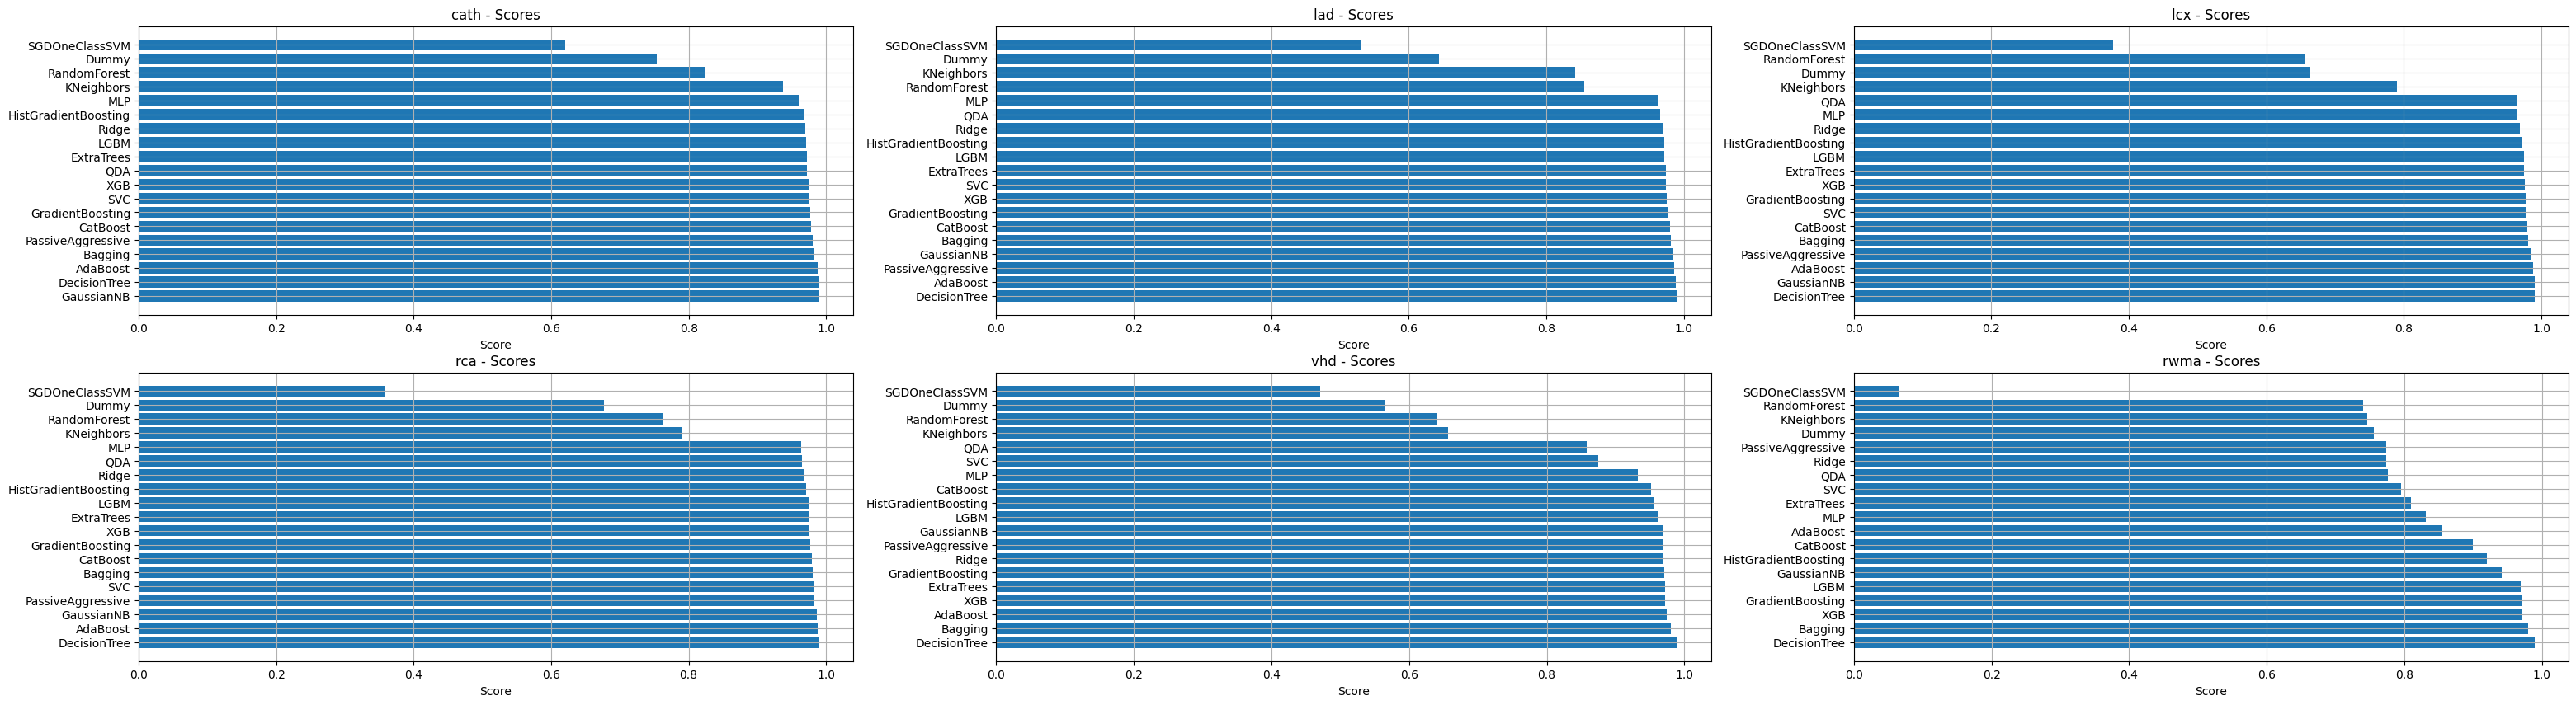

In [38]:
# Create a horizontal bar plot of all scores for every type of diagnosis
# have 2 rows of three
# first row is cath, lad, lcx
# second row is rca, vhd, rwma
# subplots
fig, axs = plt.subplots(2, 3, figsize=(38, 10))

for index, options in enumerate(diagnosis_options):
    scores = {}
    for model in models:
        scores.update({model: get_score(f'{options} - {model}')})
    all_scores_sorted = dict(sorted(scores.items(), key=lambda item: item[1], reverse=True))
    row = index // 3
    col = index % 3
    axs[row, col].barh(list(all_scores_sorted), list(all_scores_sorted.values()), align='center')
    axs[row, col].set_title(f'{options} - Scores')
    axs[row, col].set_xlabel('Score')
    axs[row, col].grid(True)
plt.savefig('./Graphs/Scores.png')
plt.show()


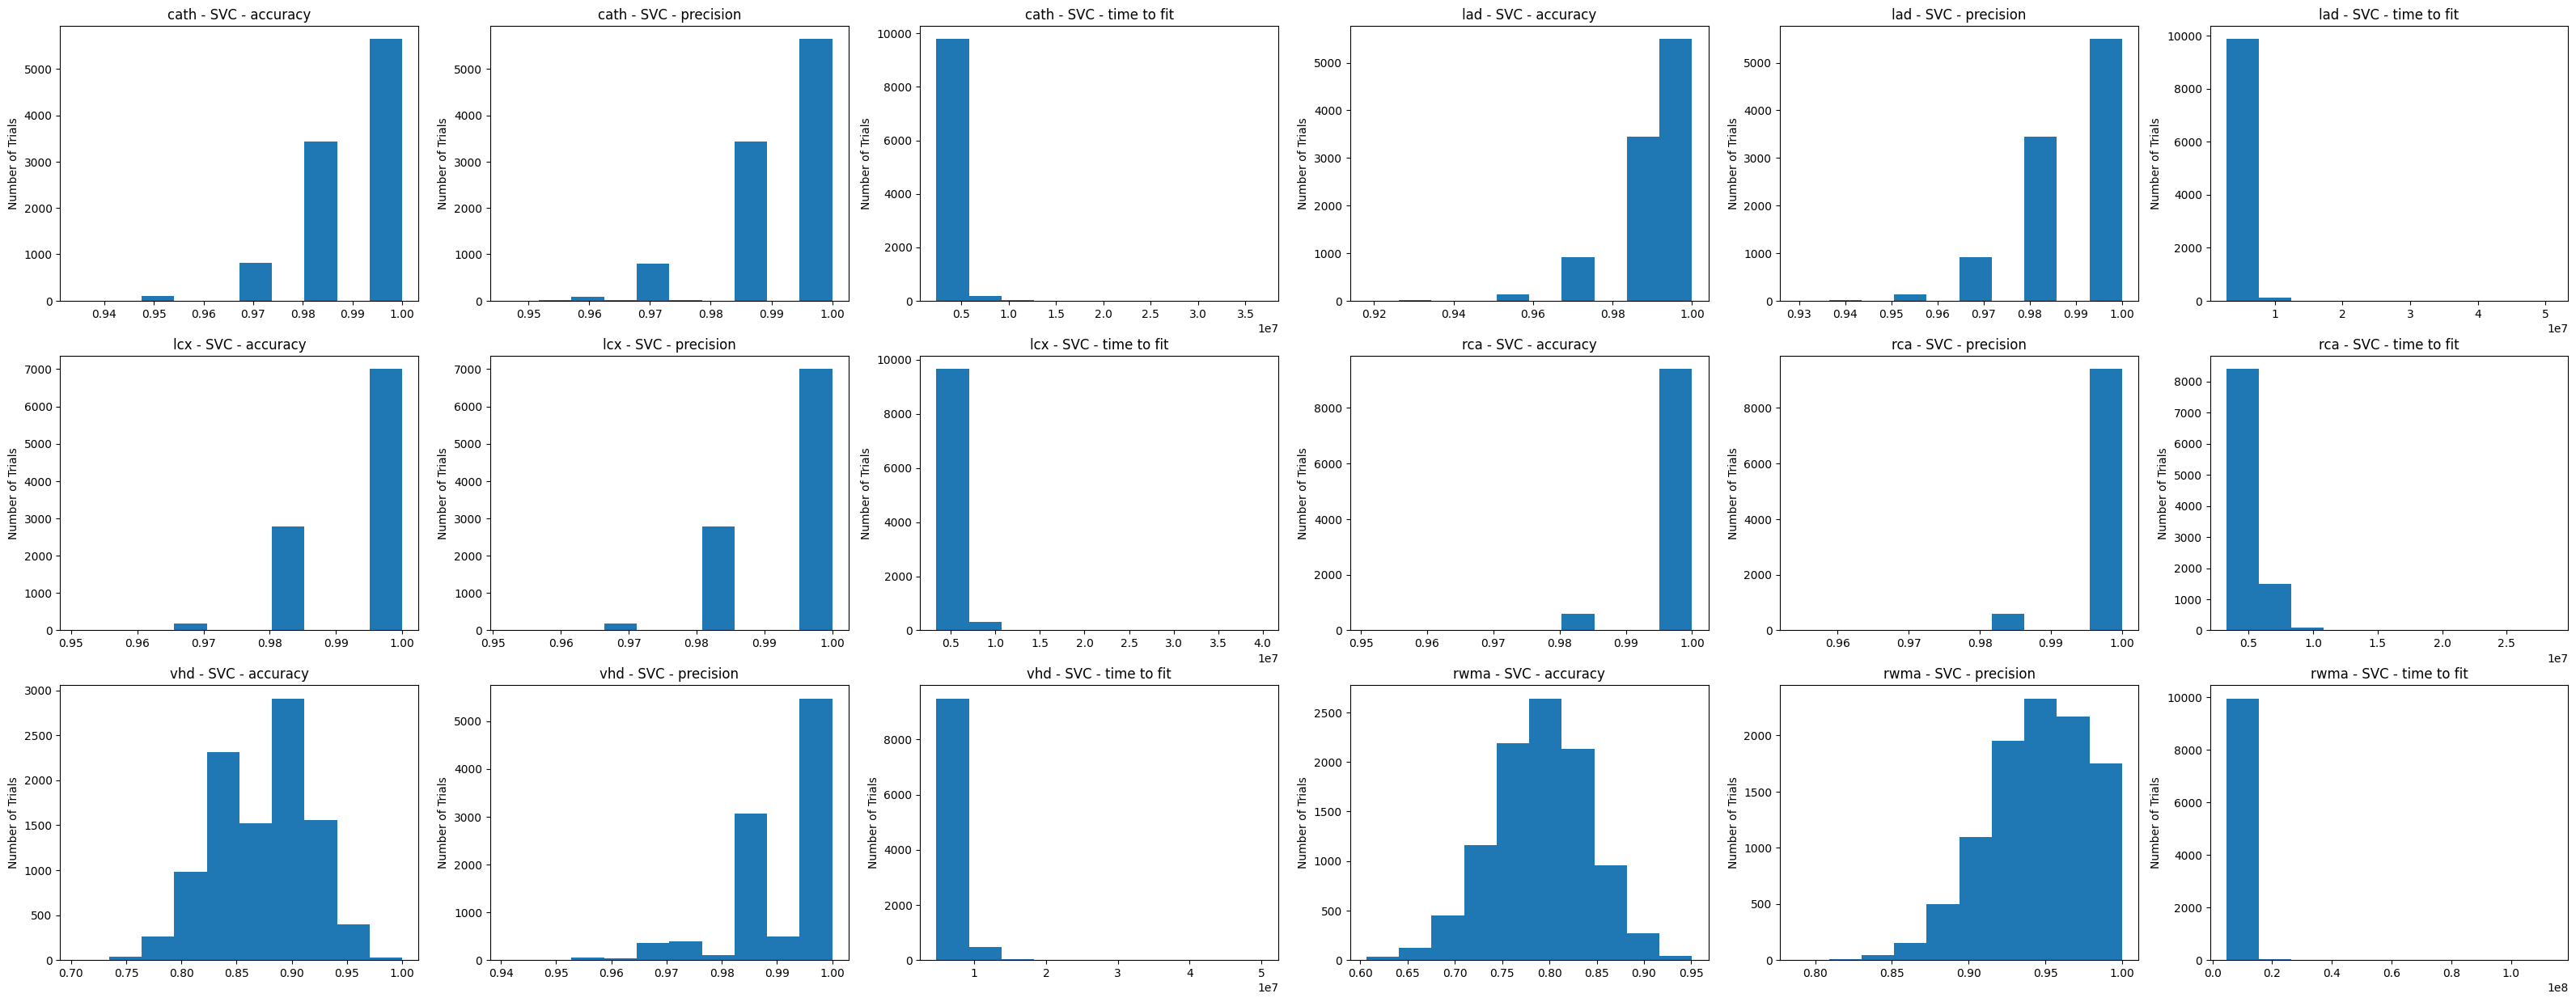

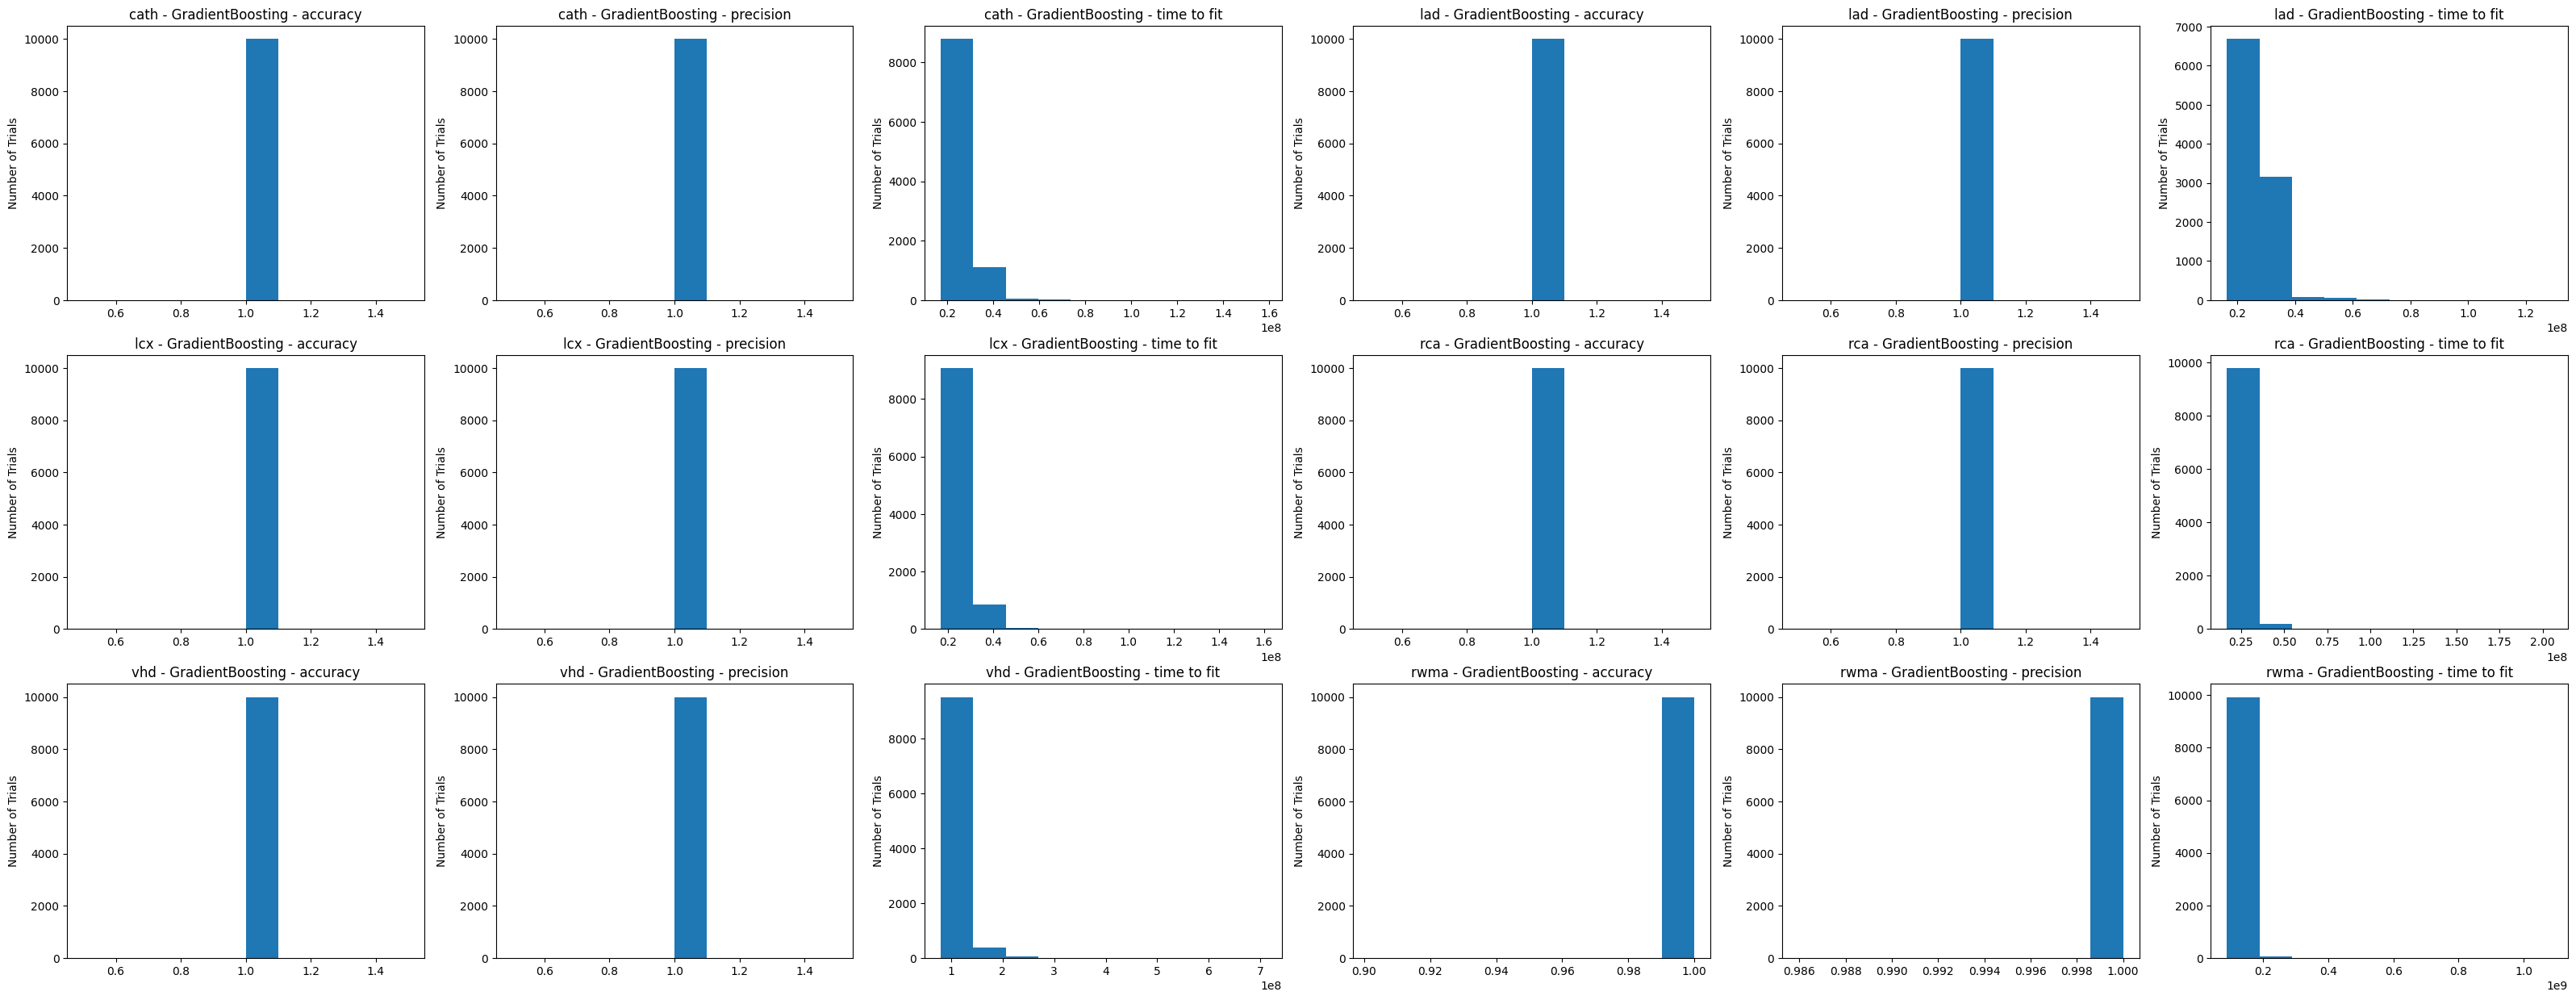

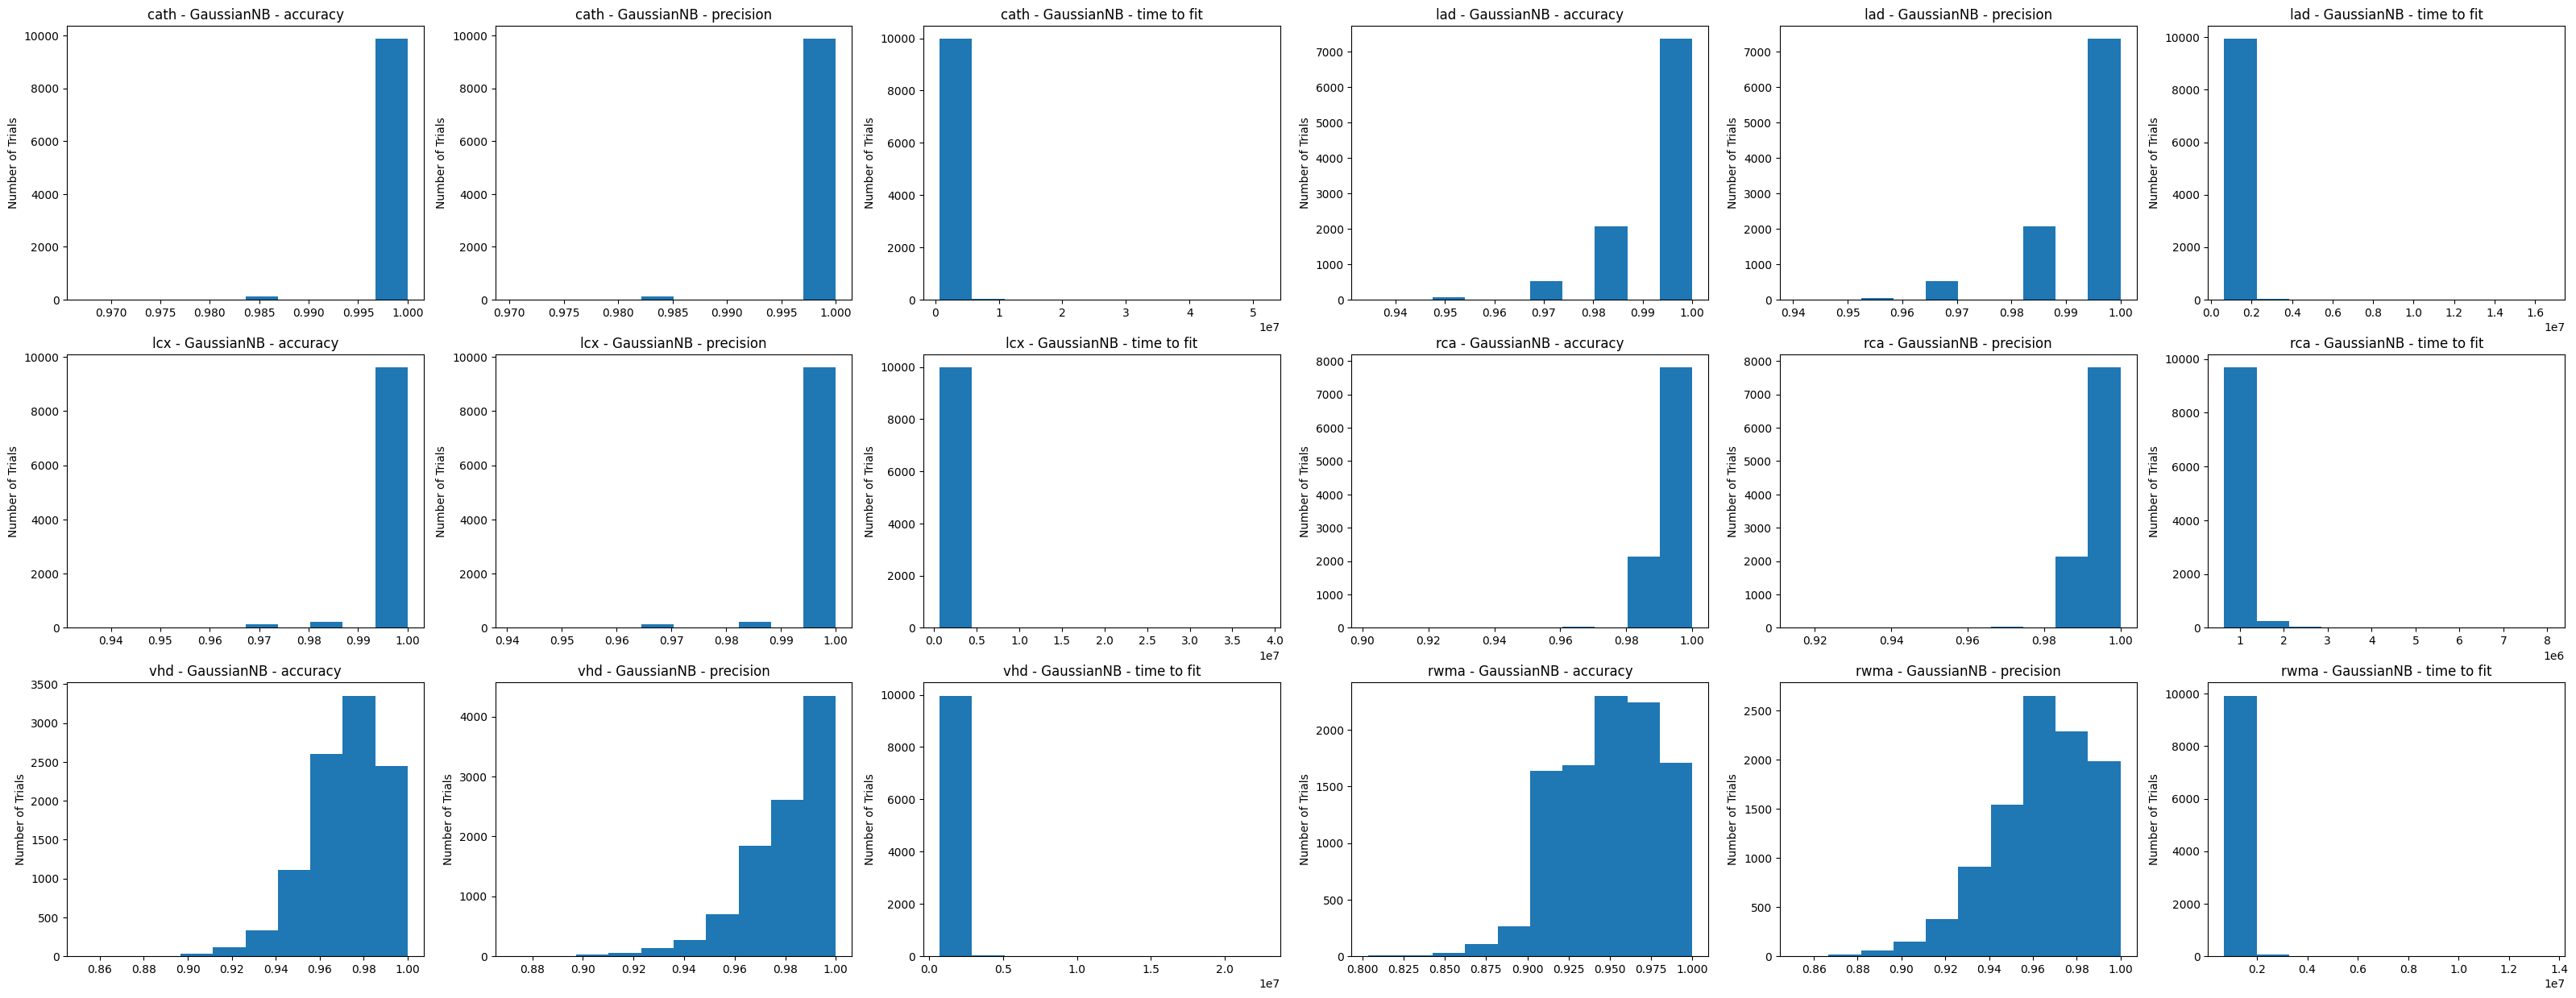

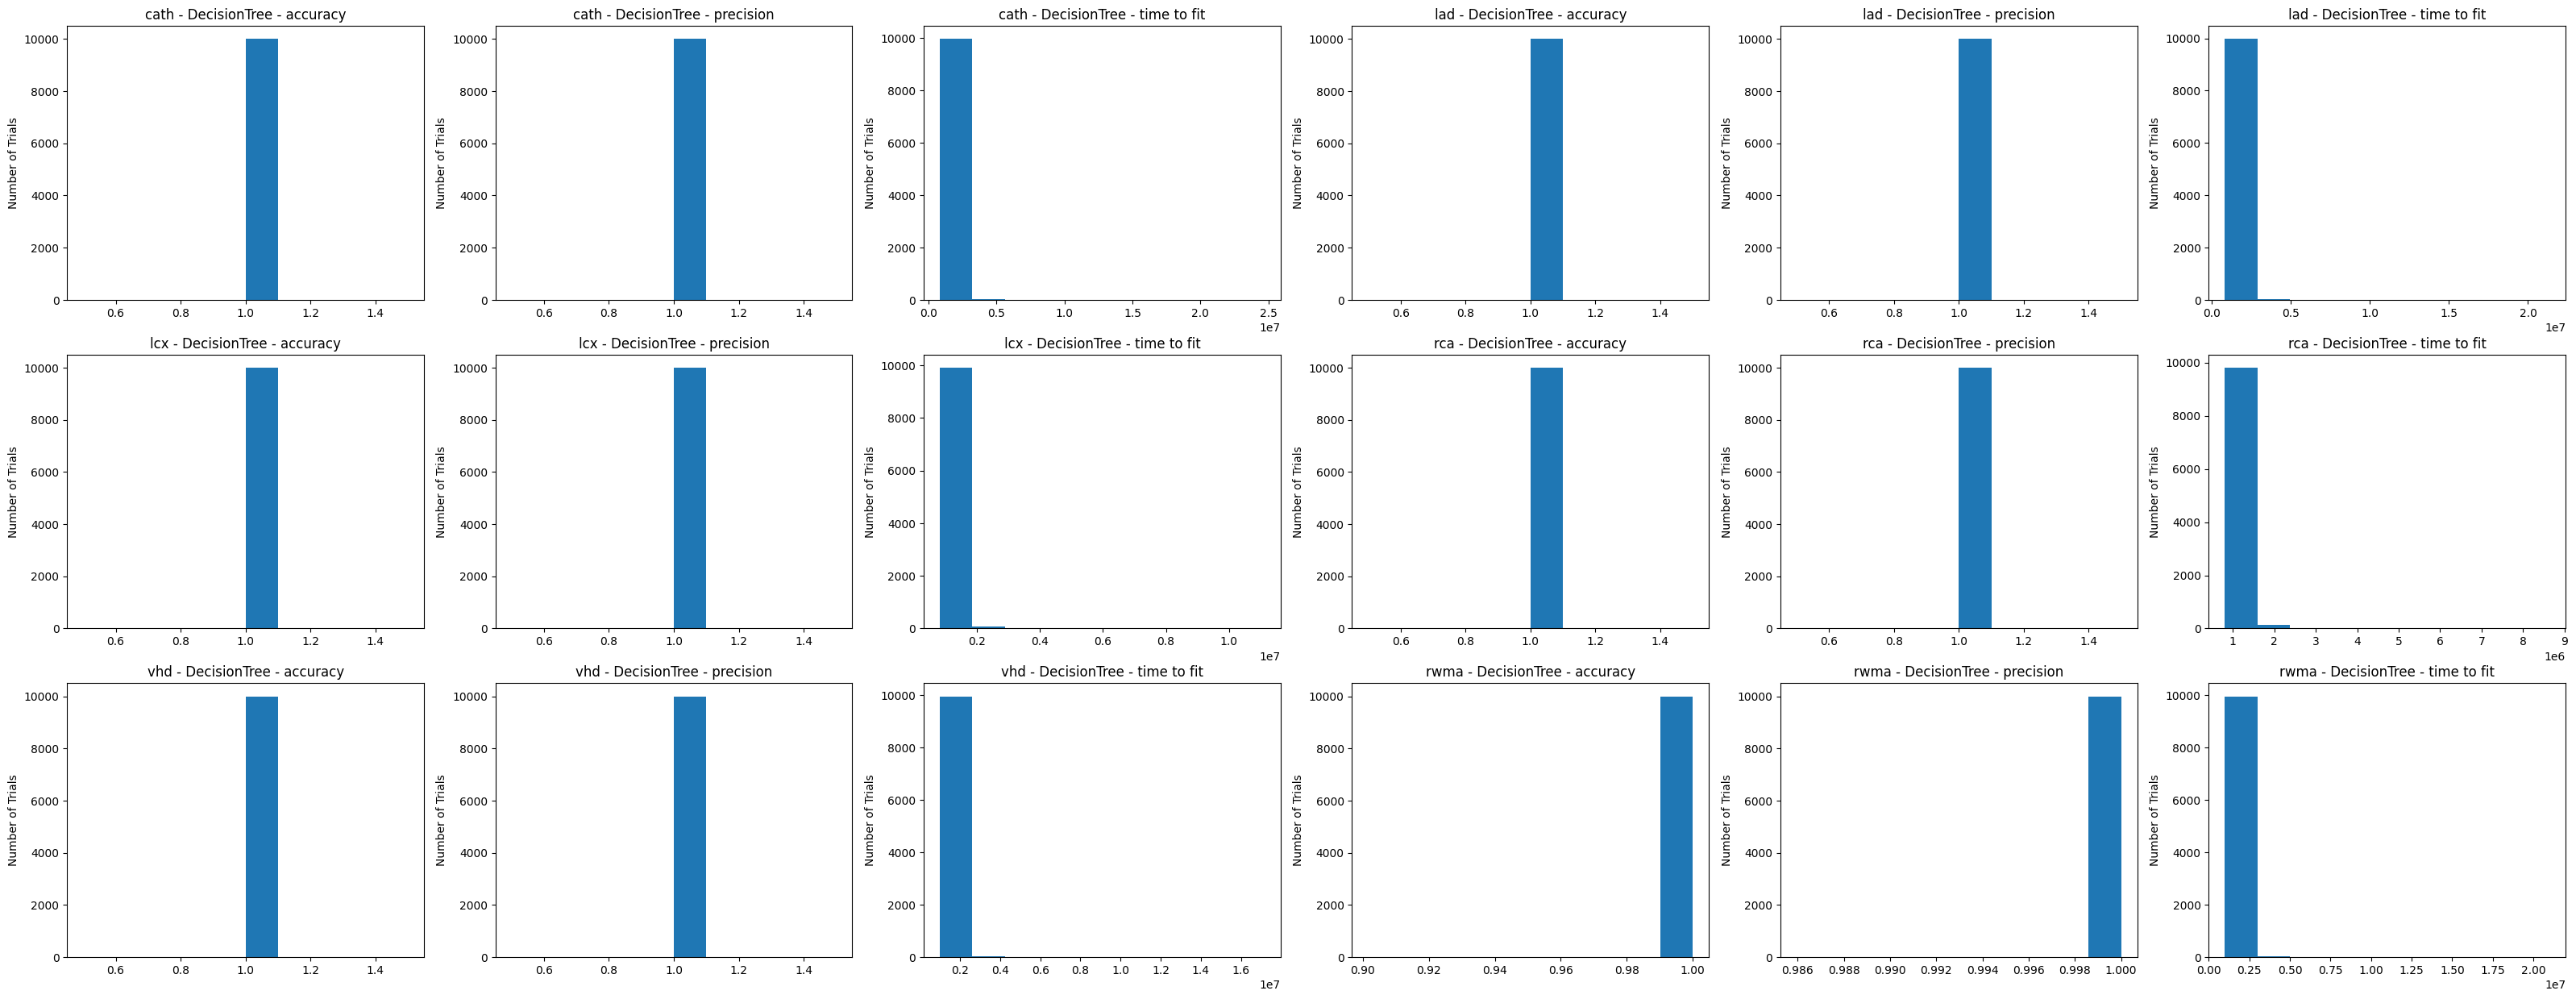

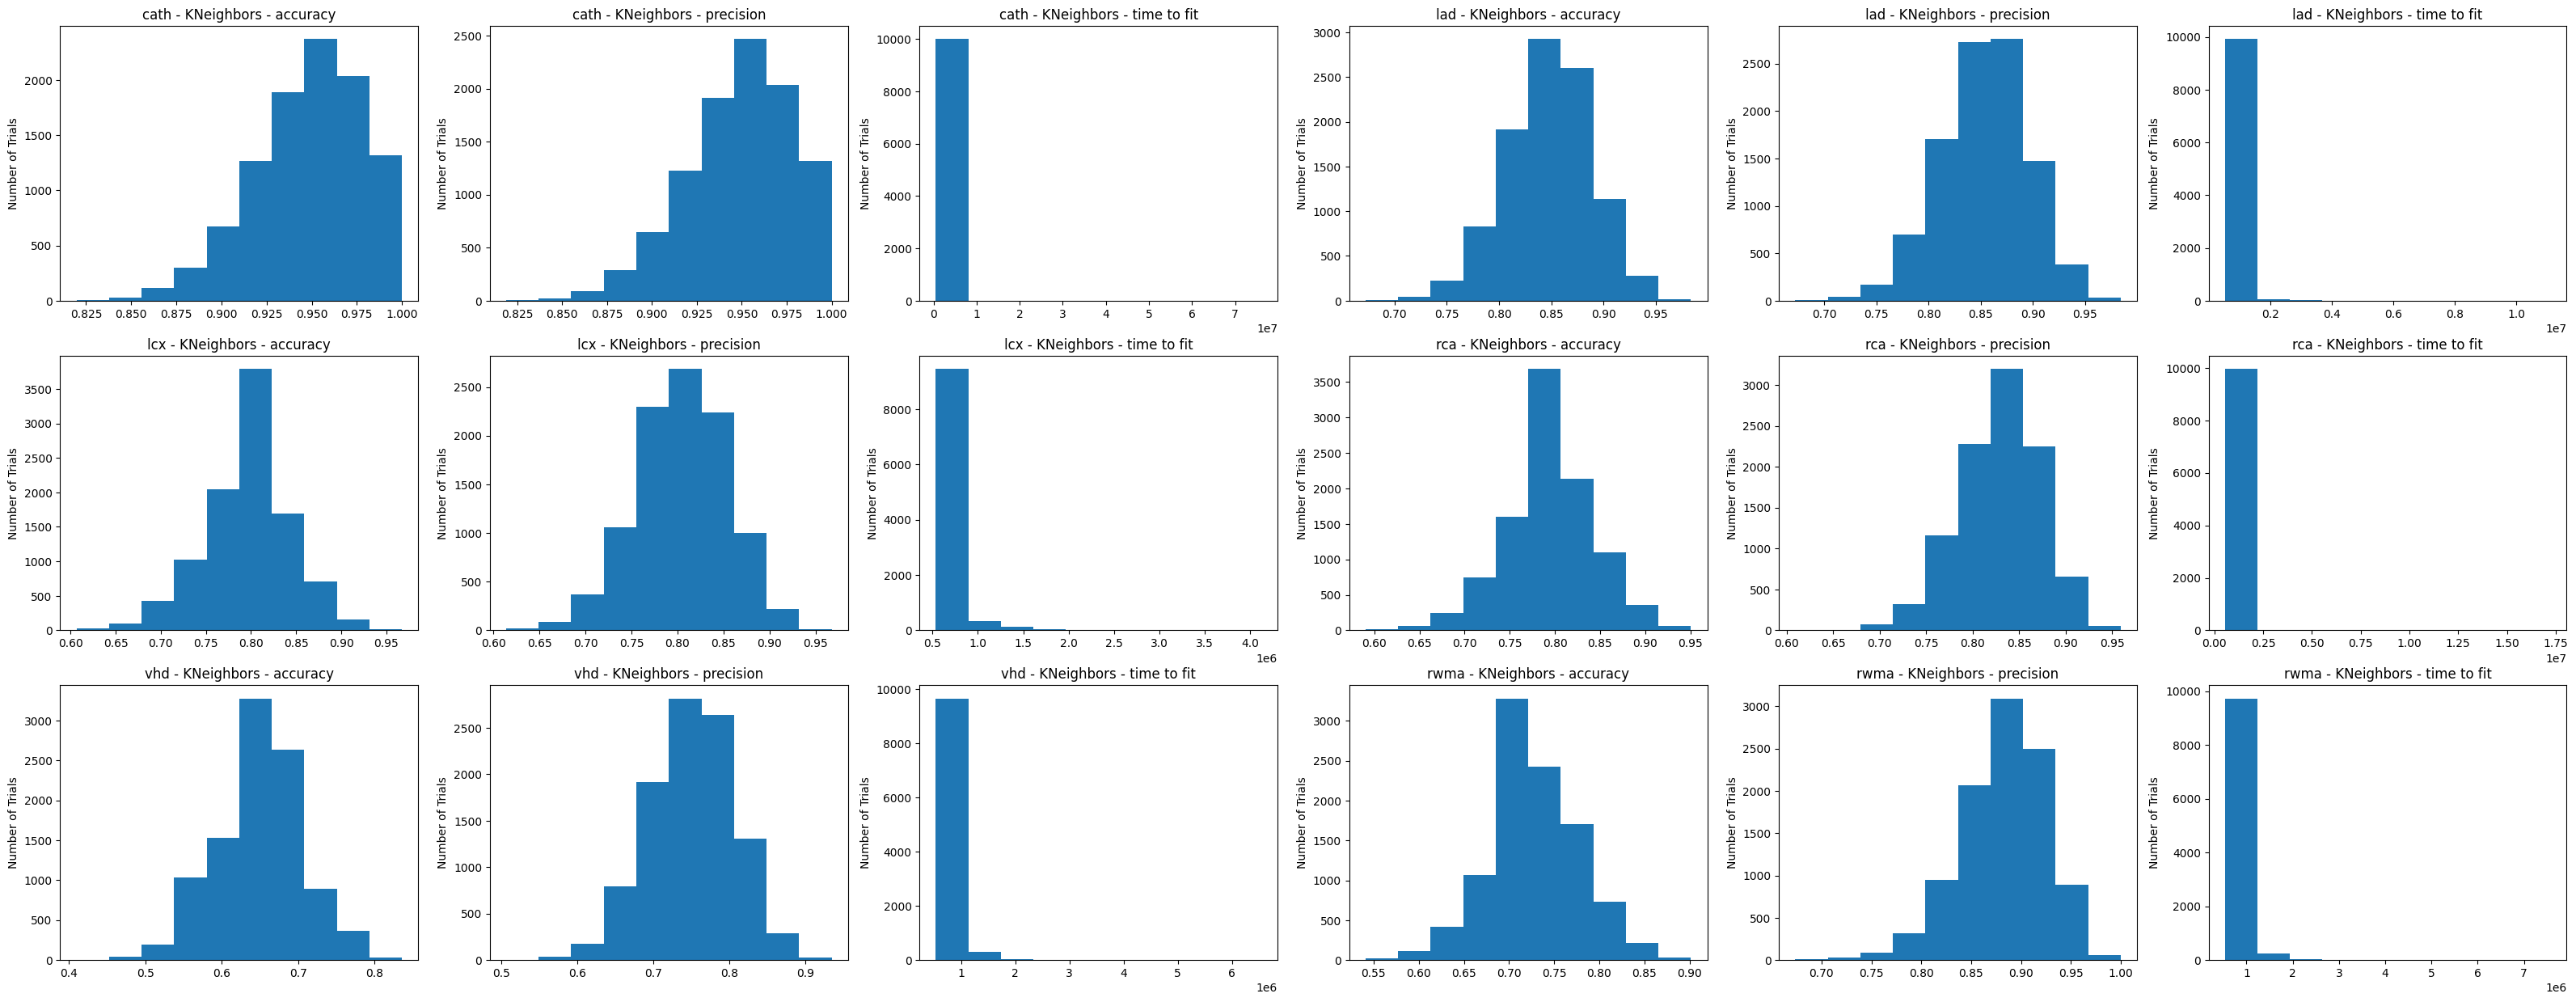

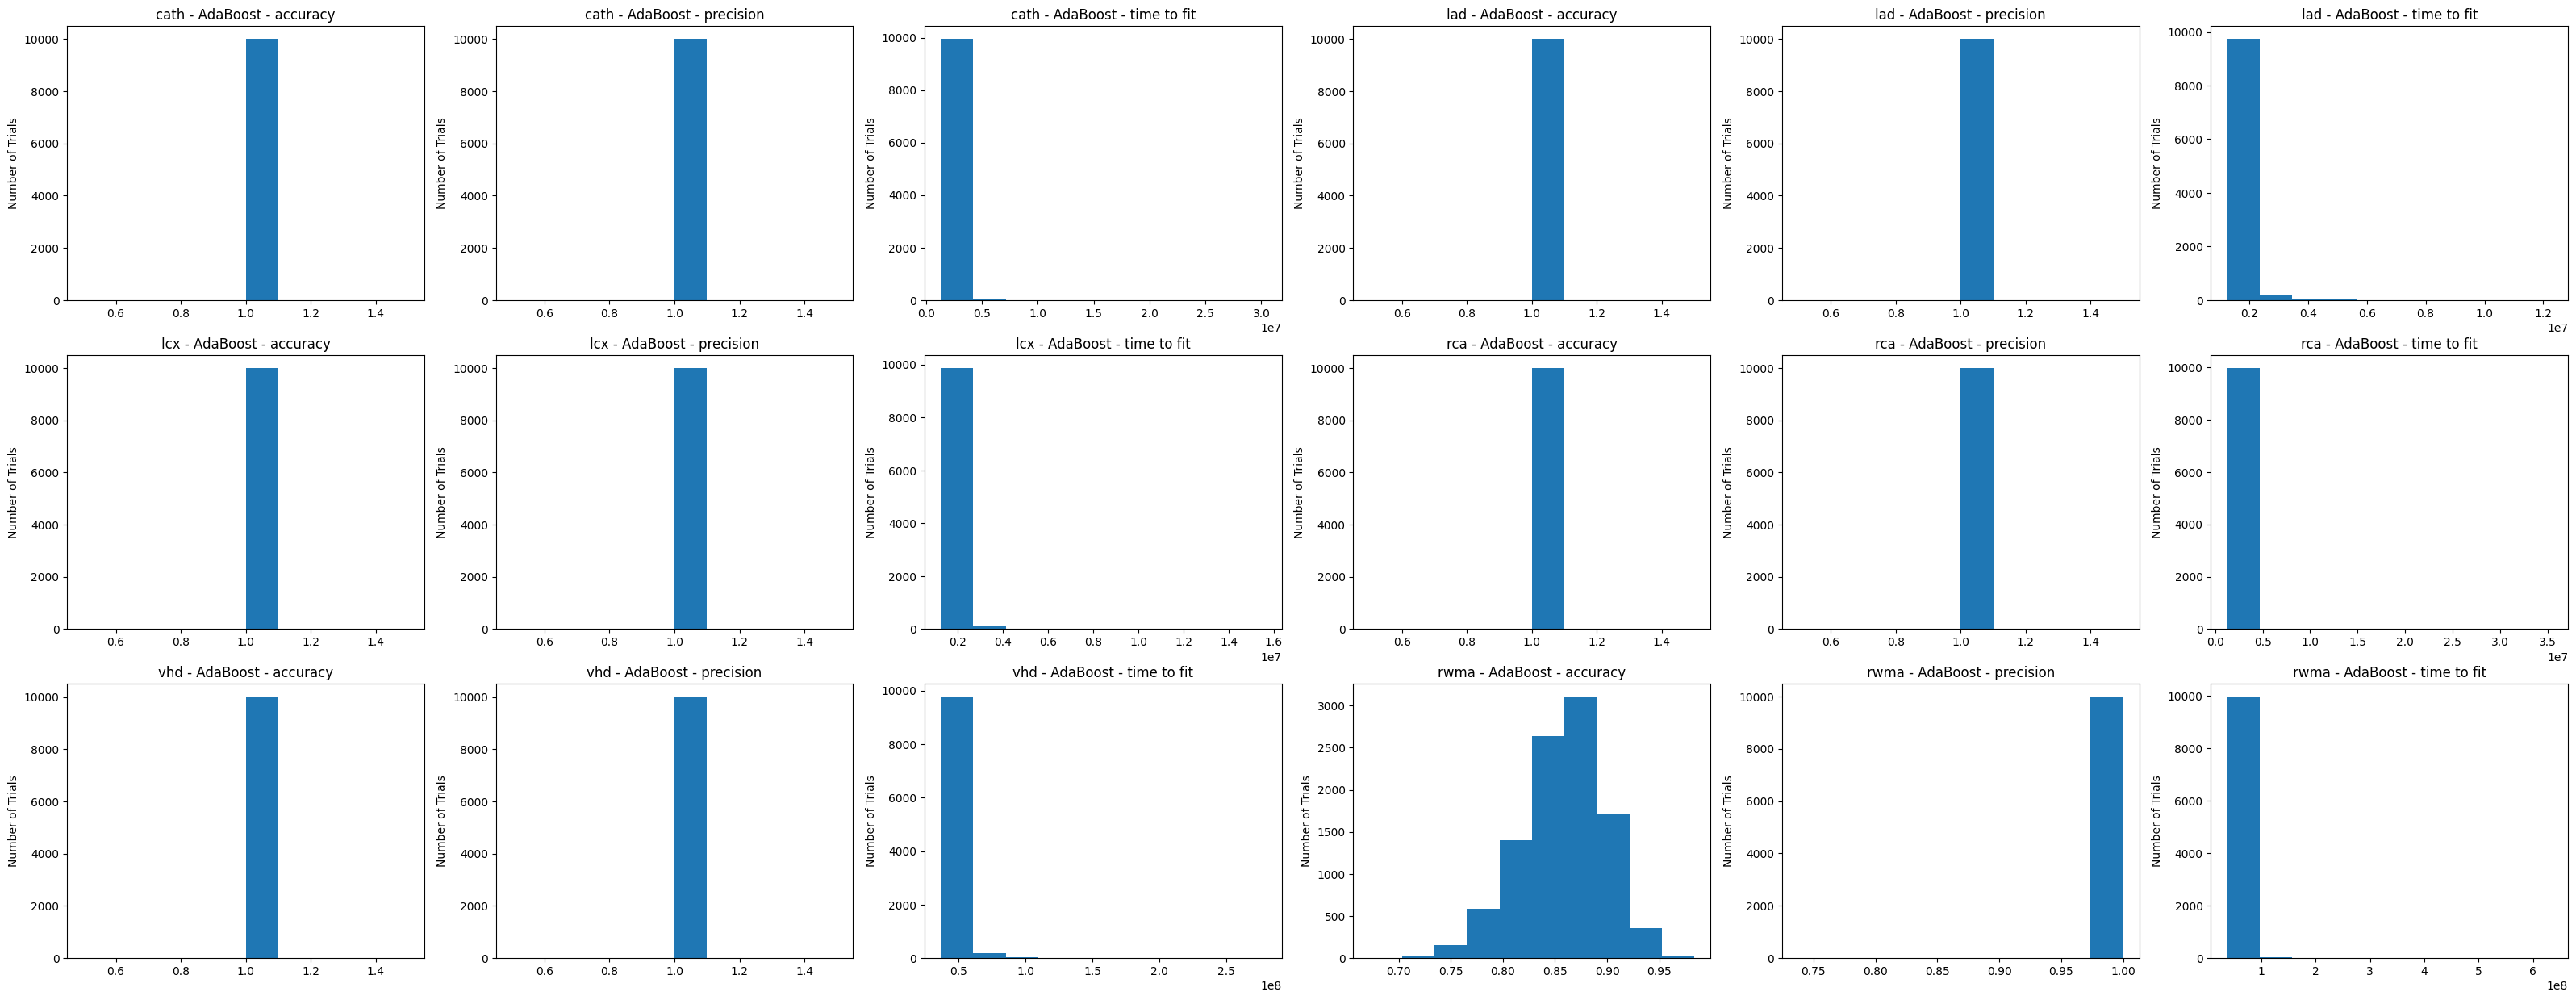

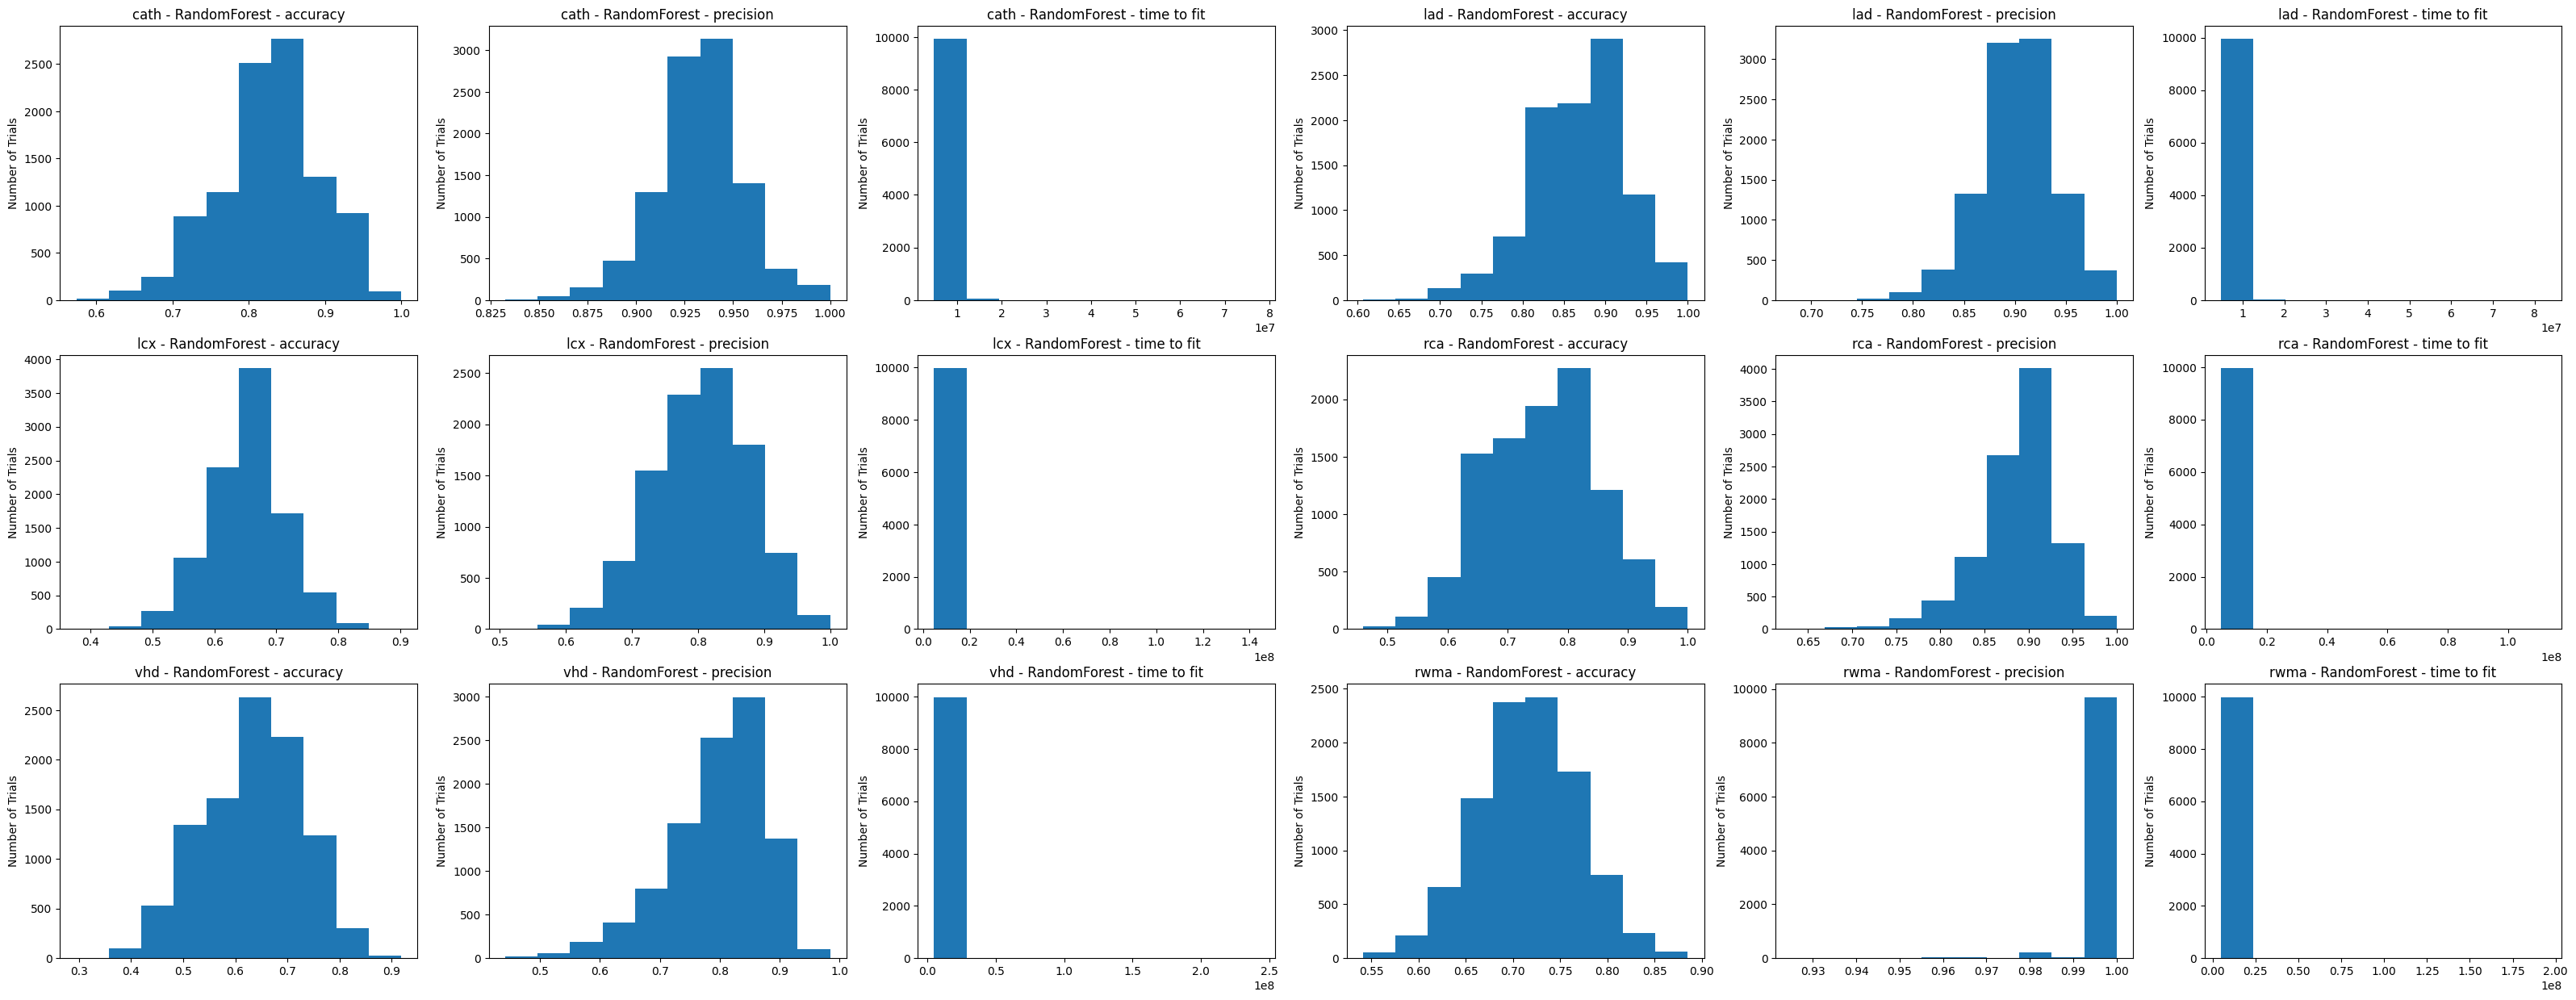

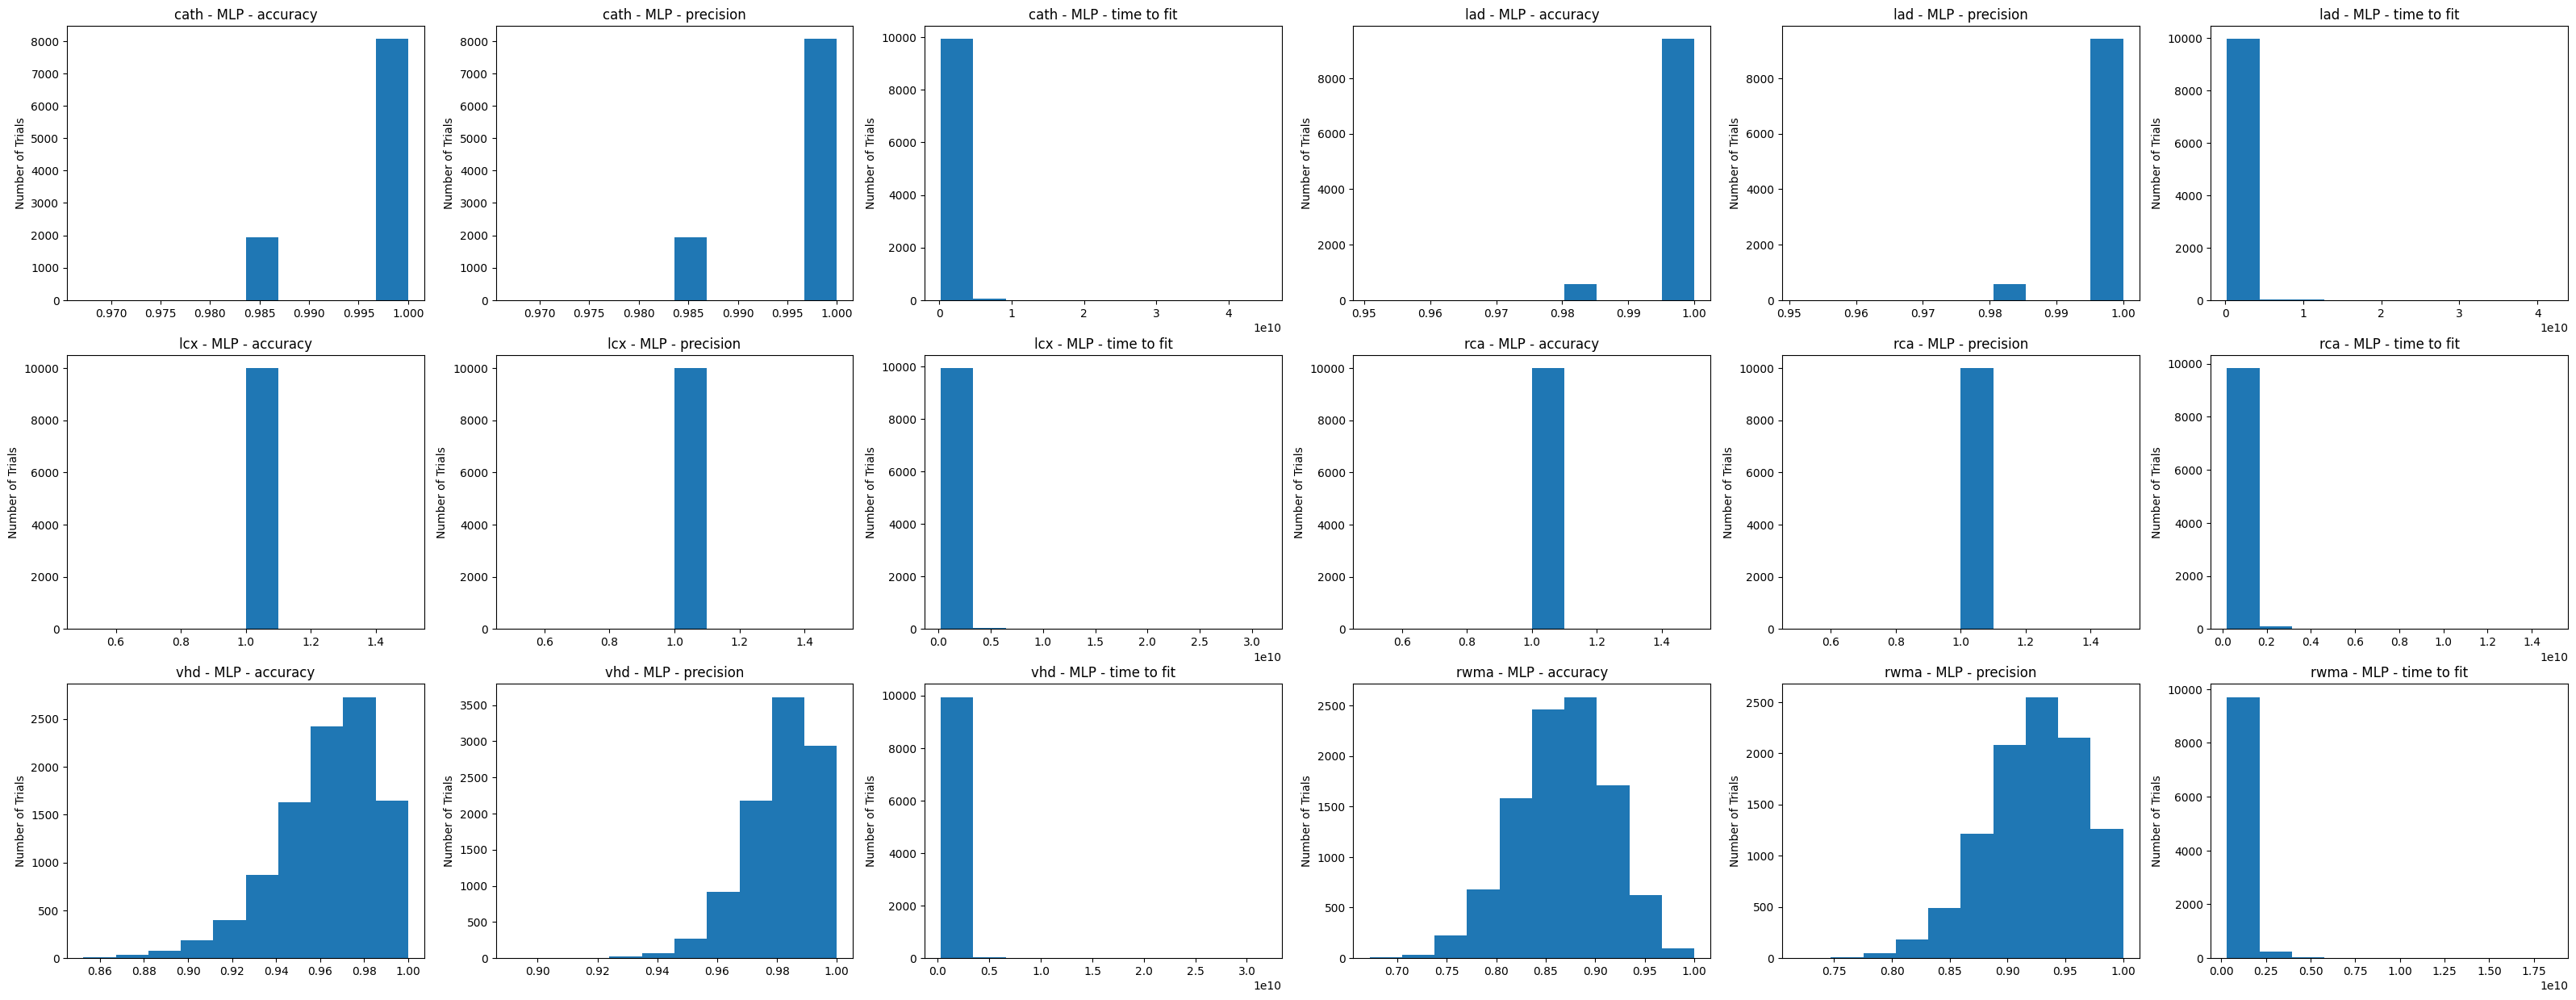

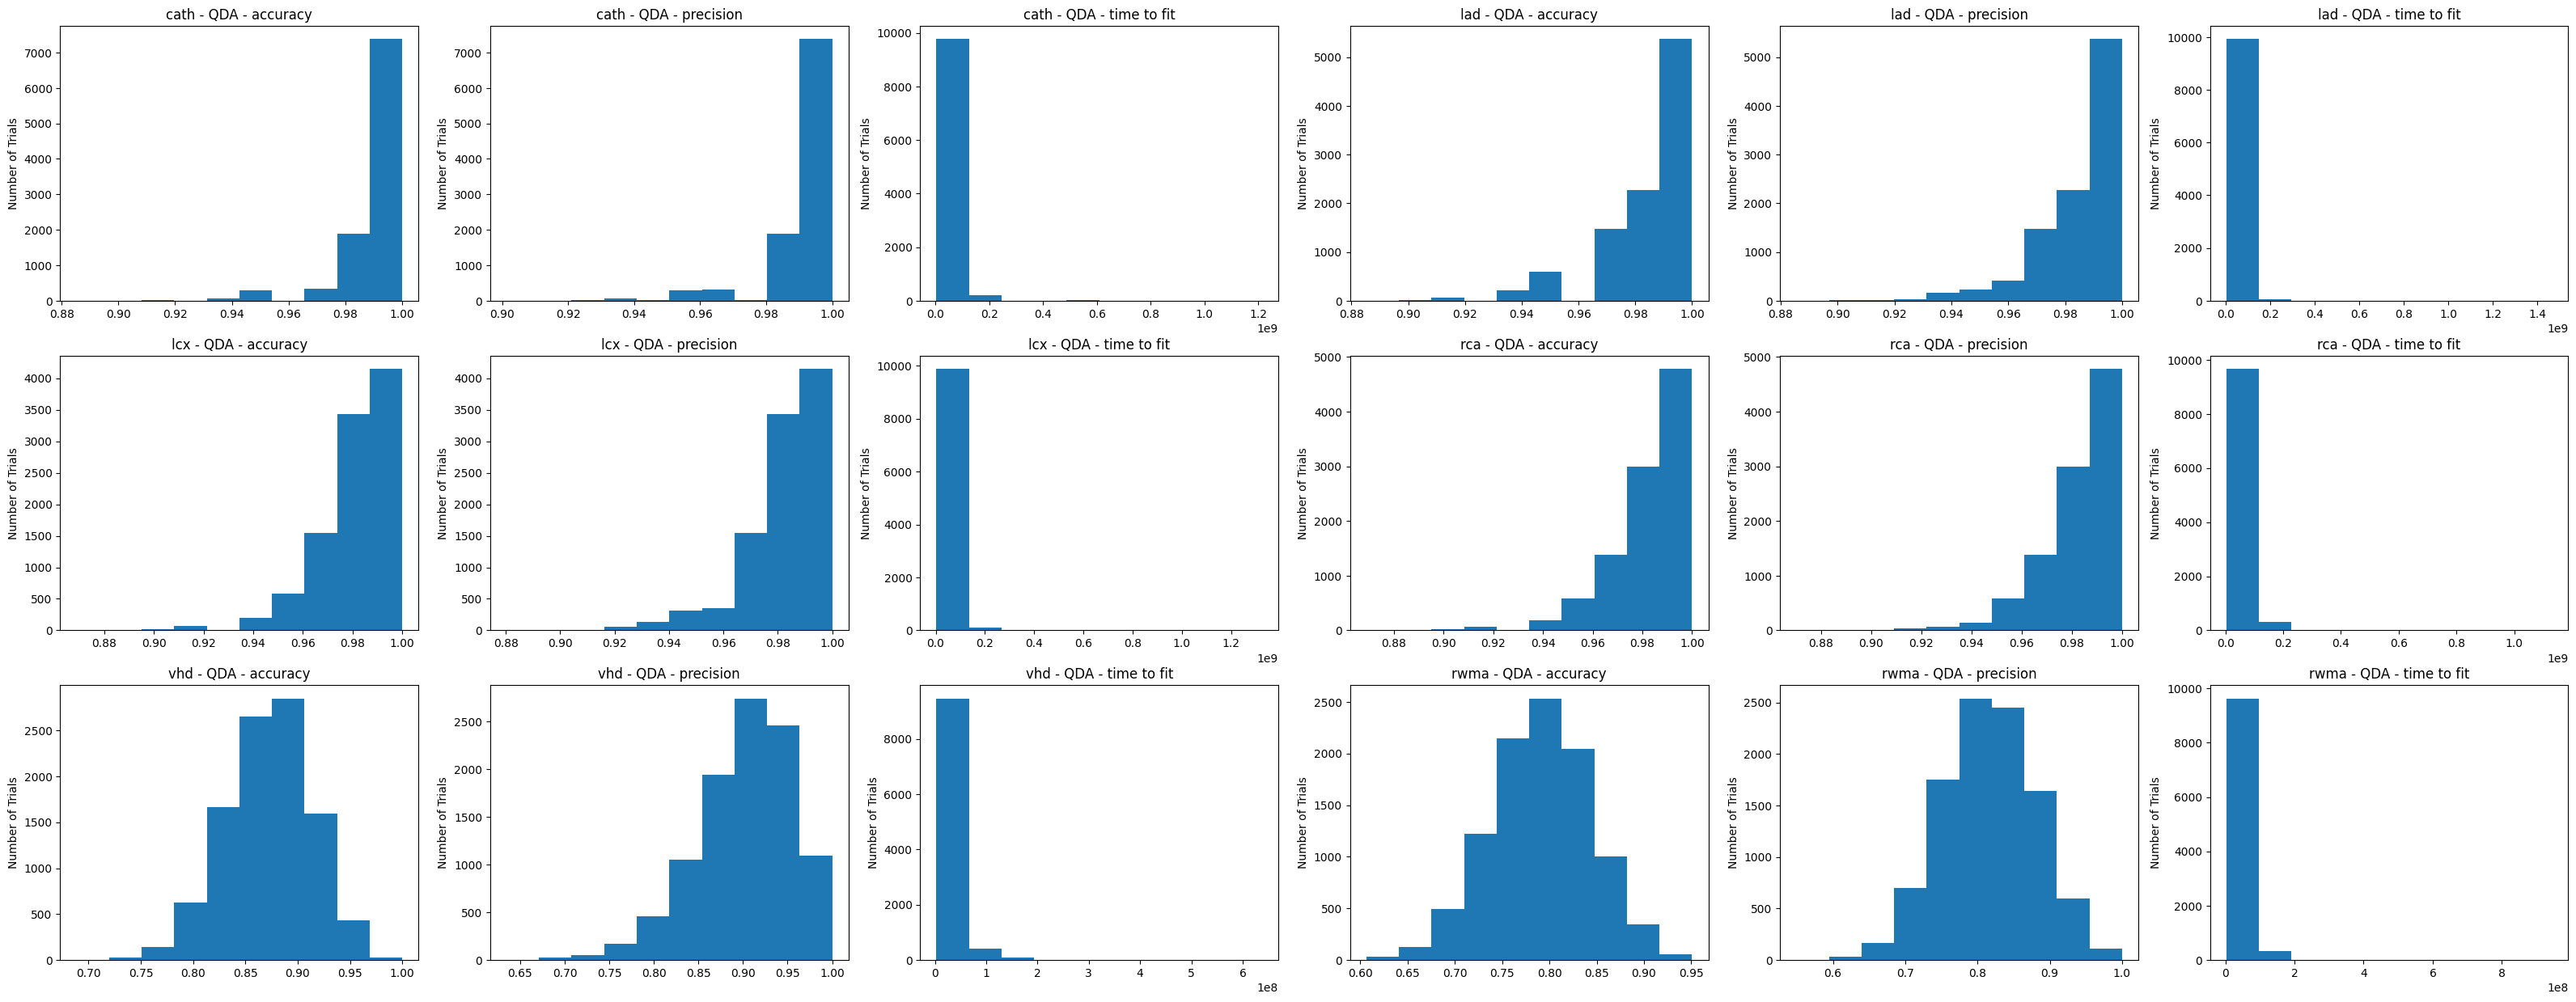

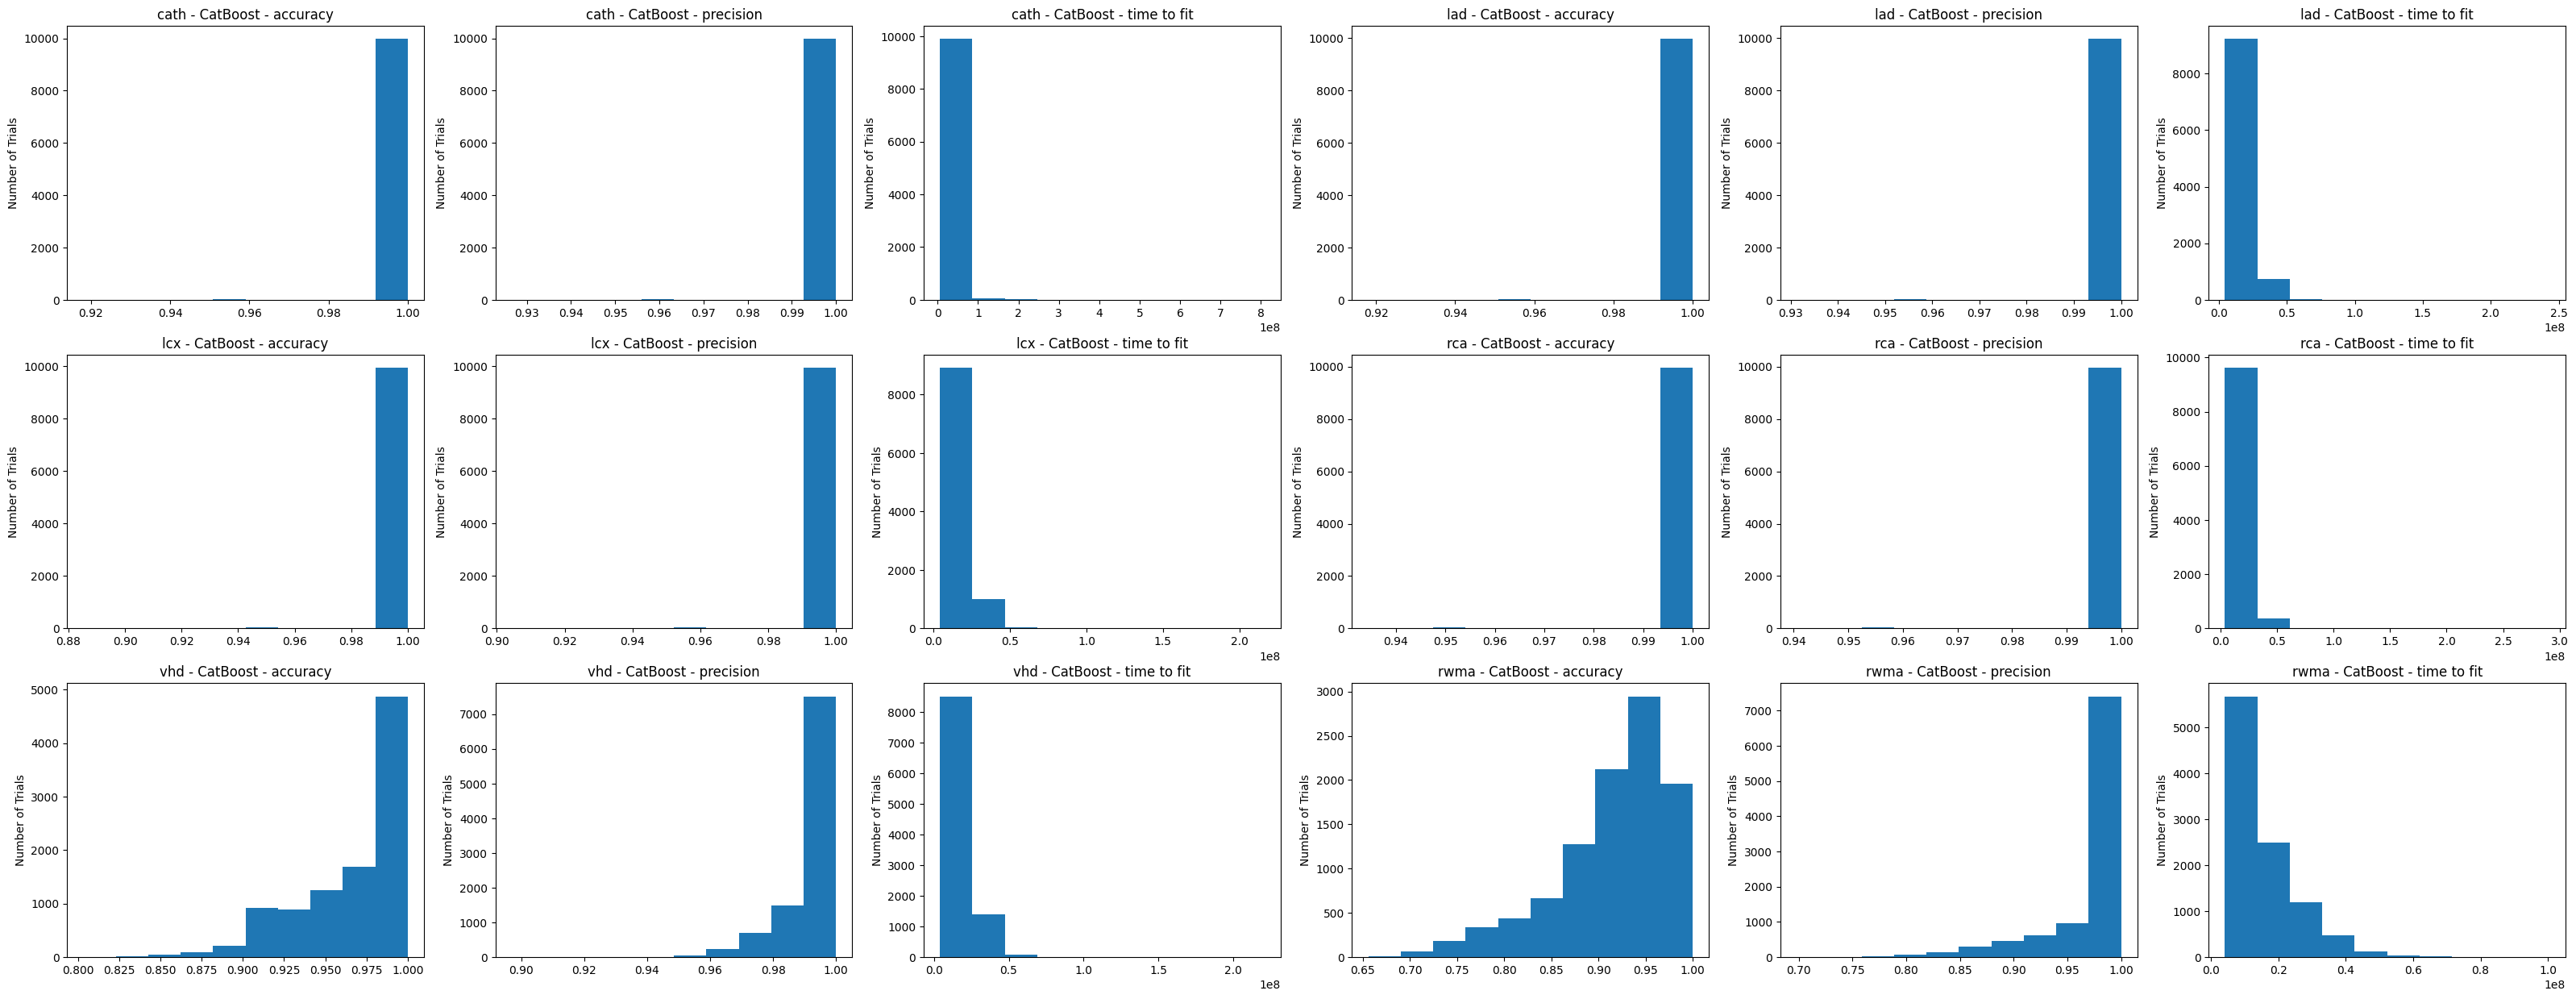

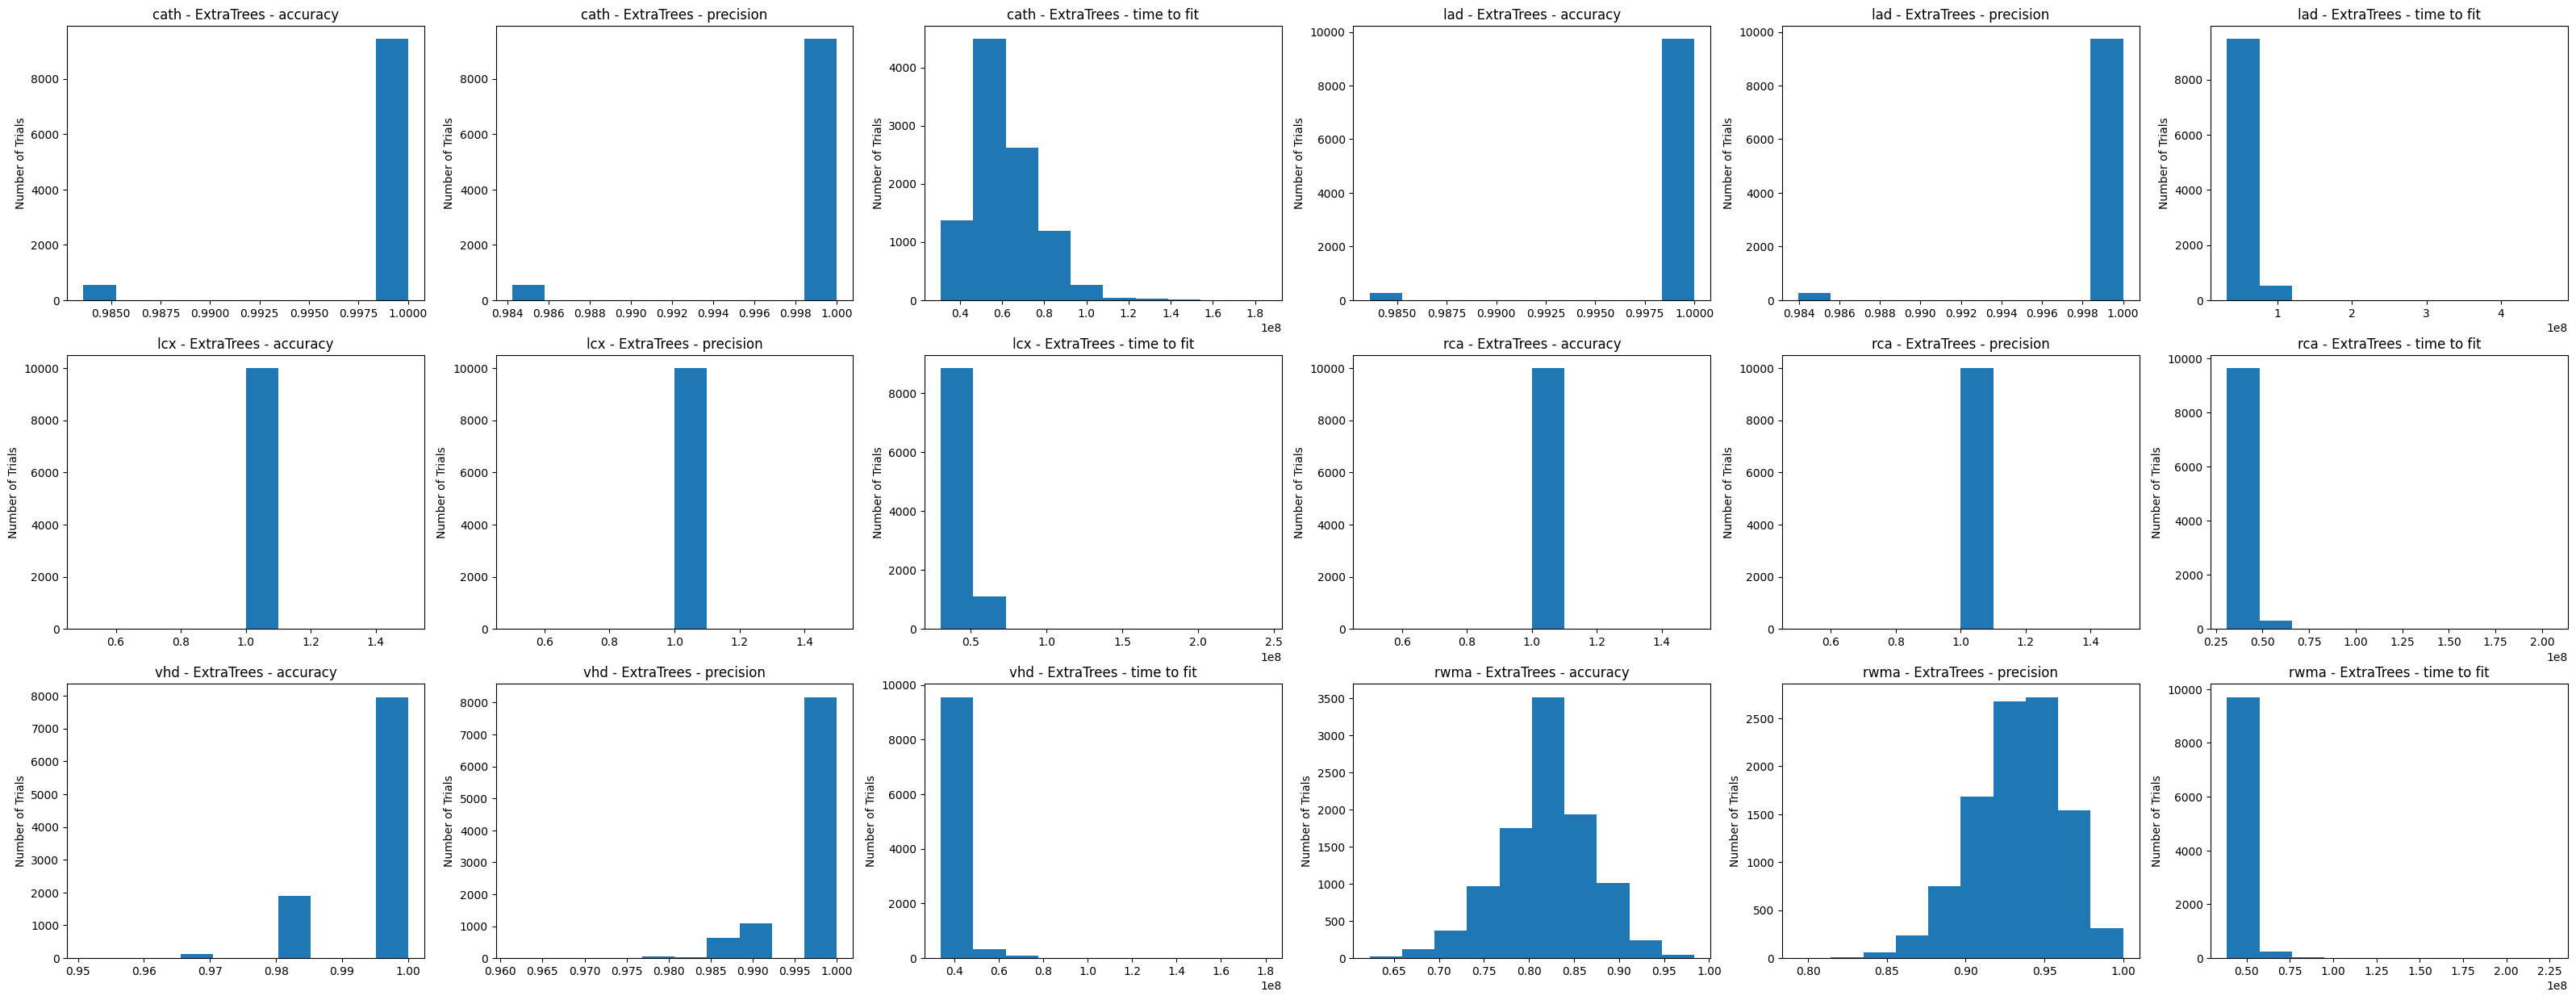

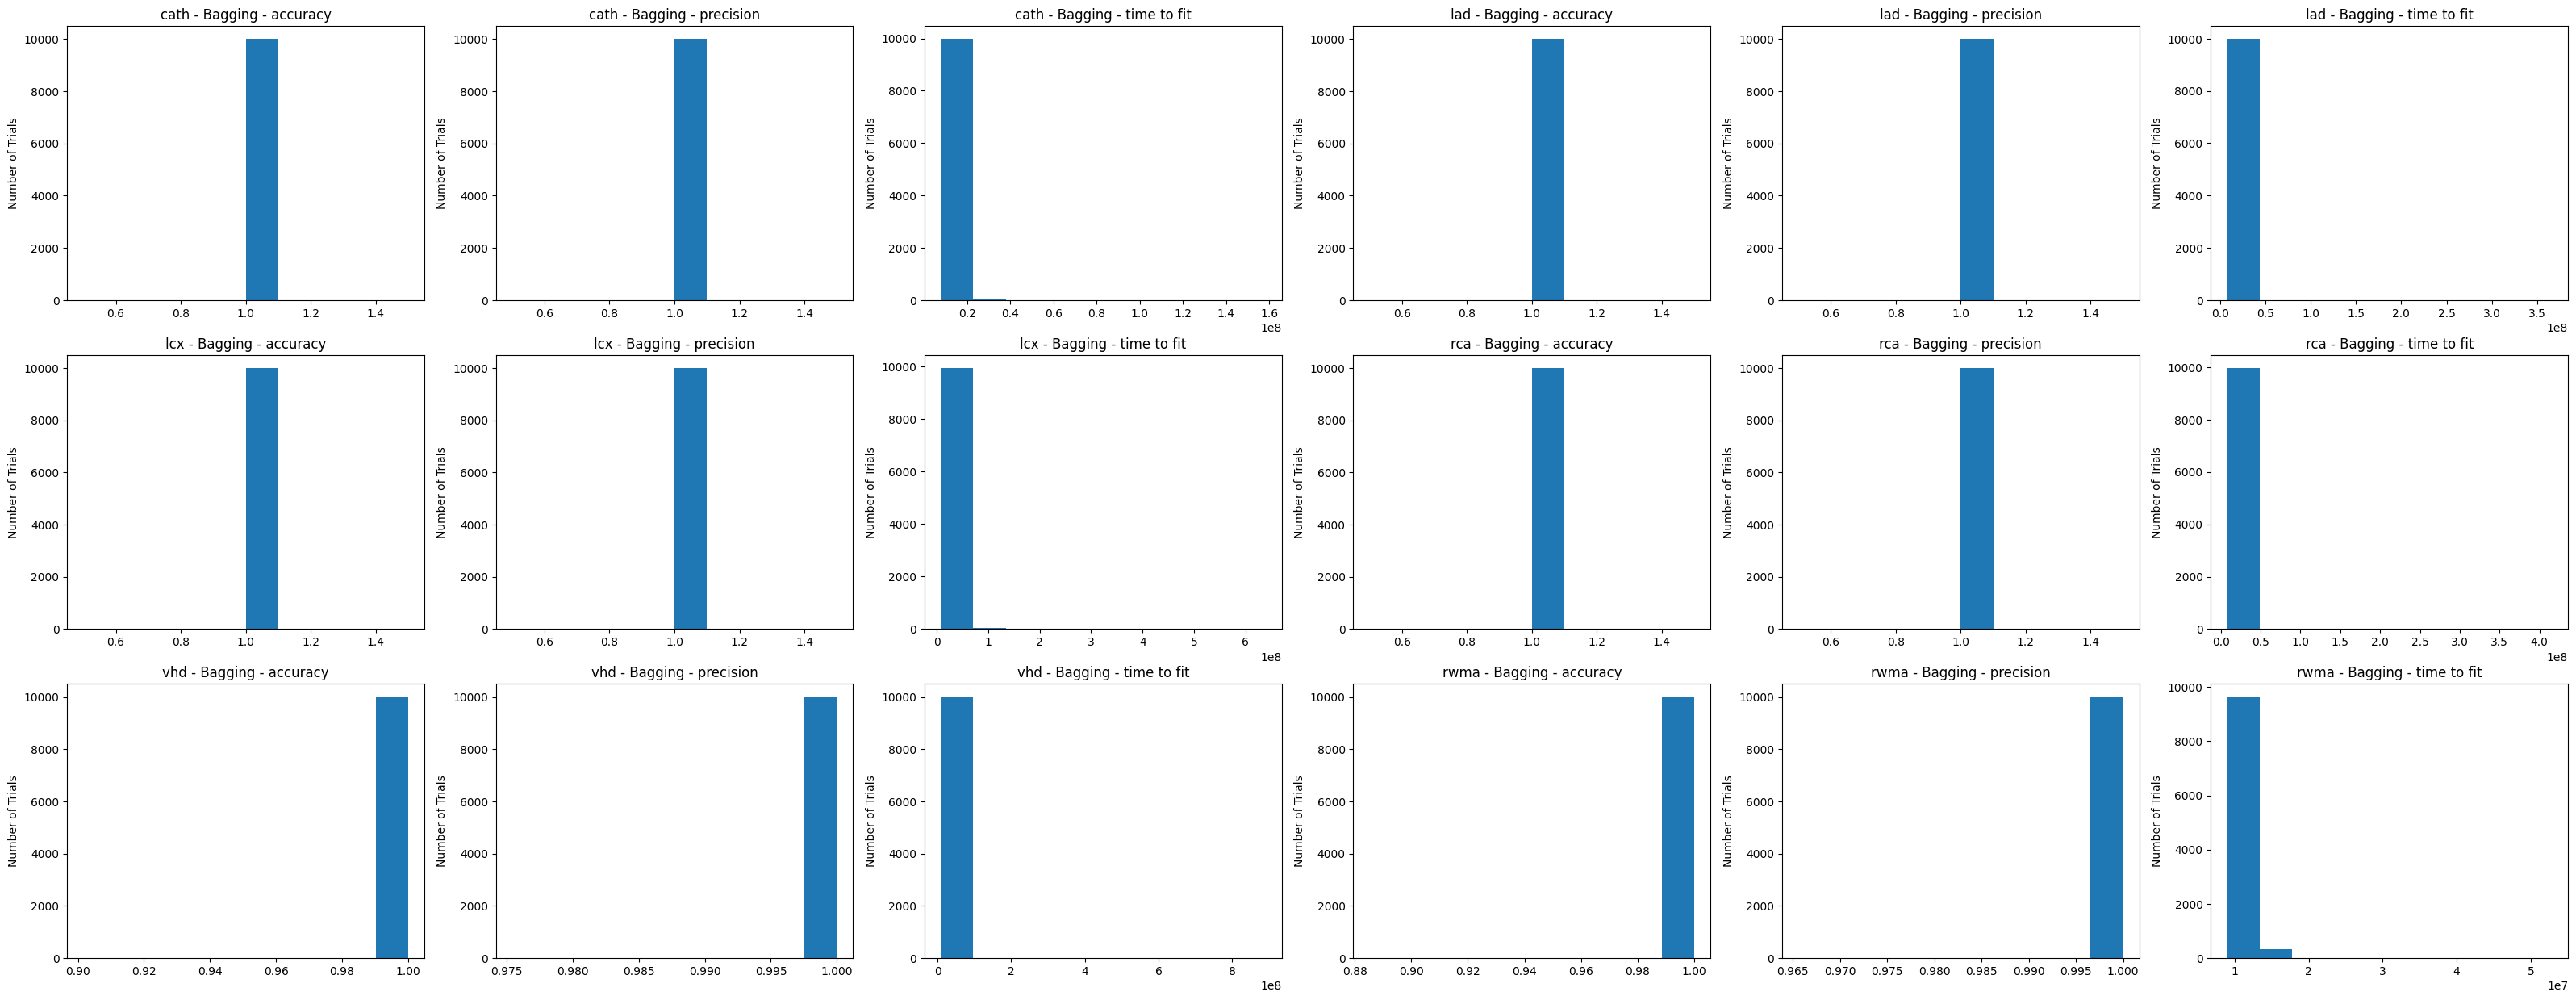

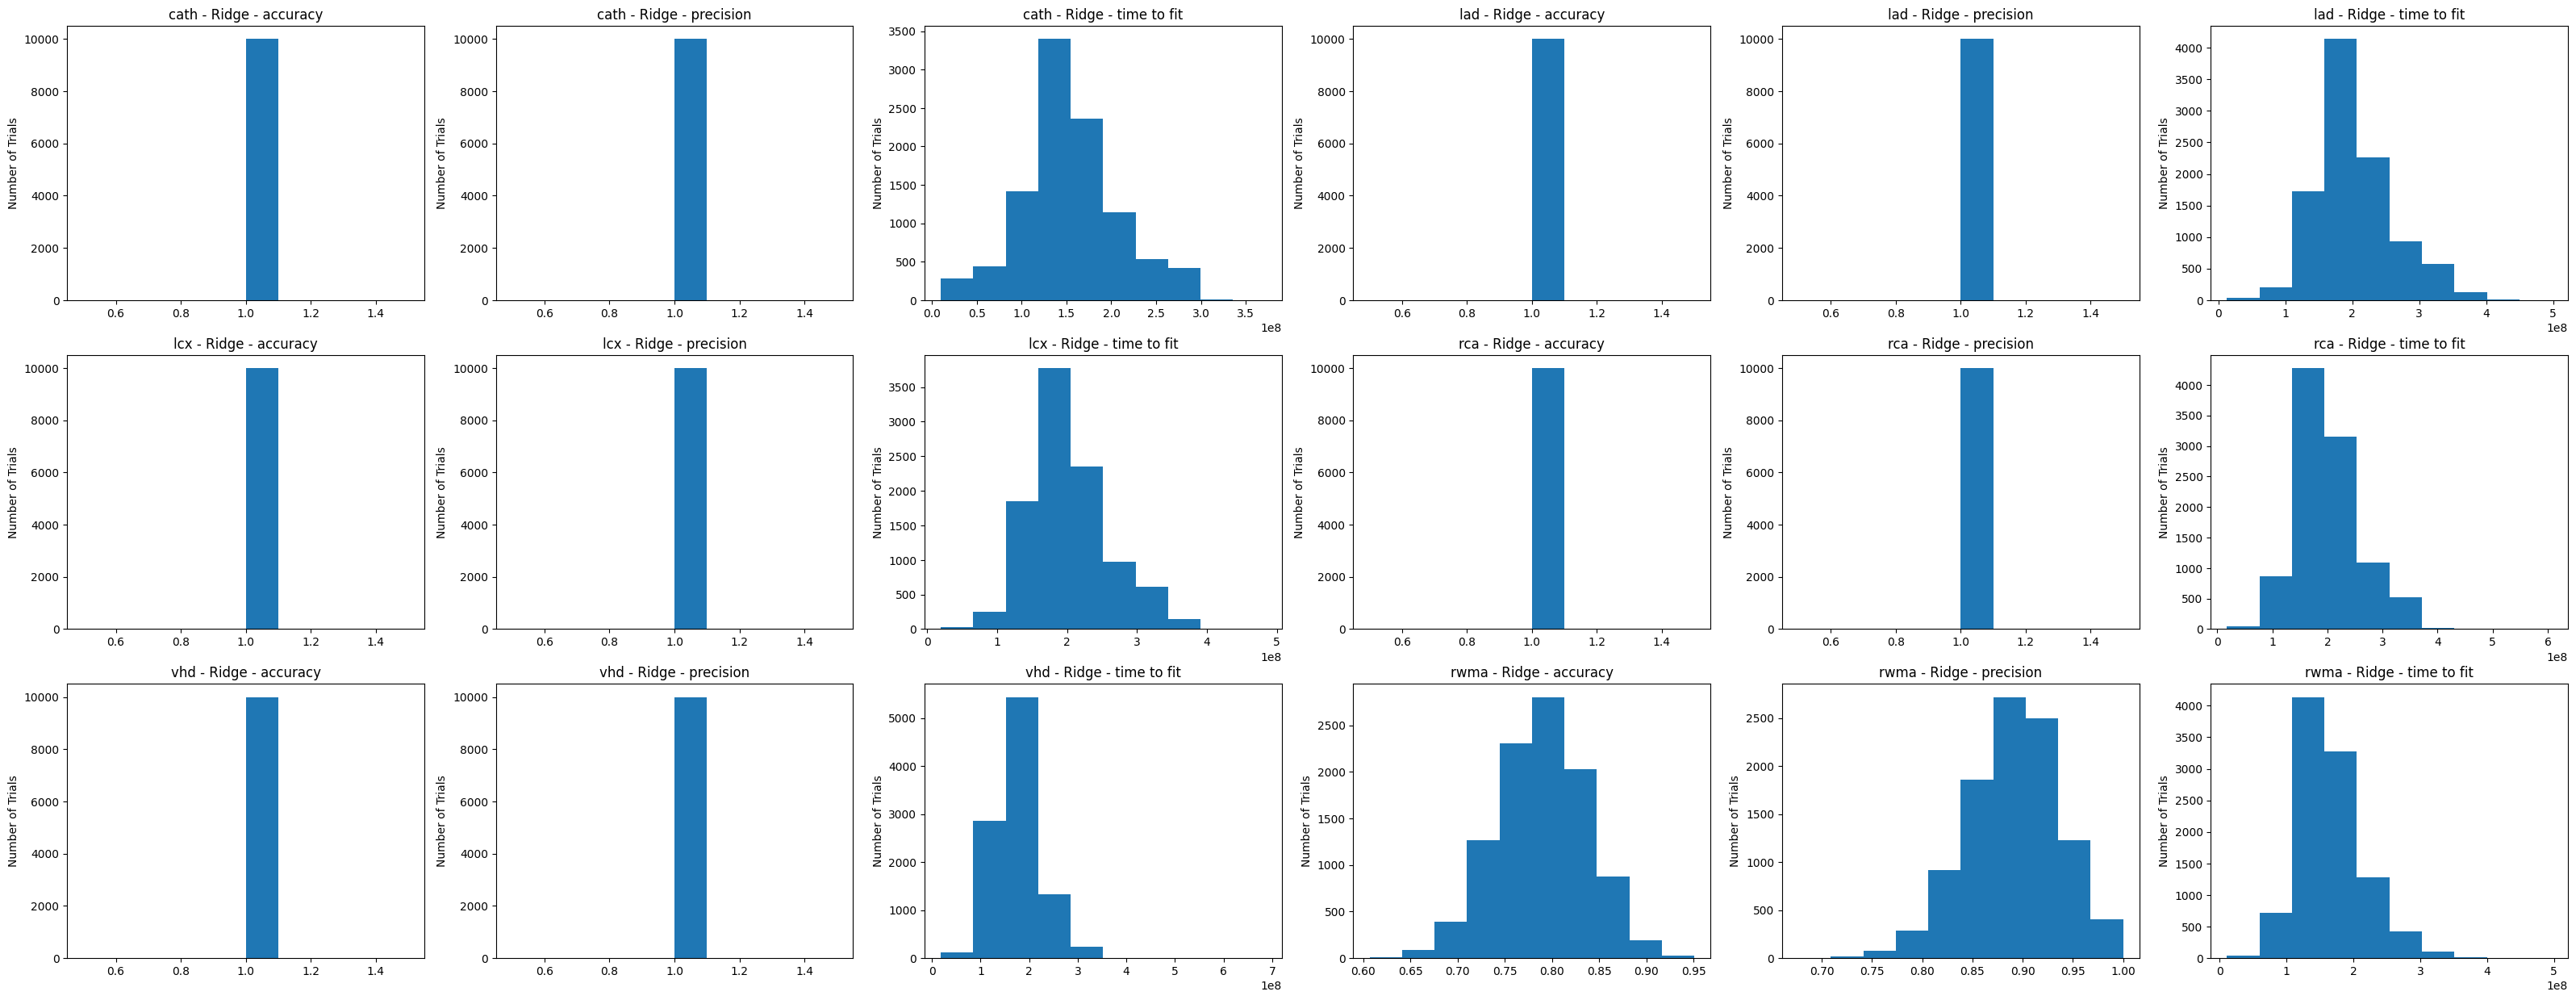

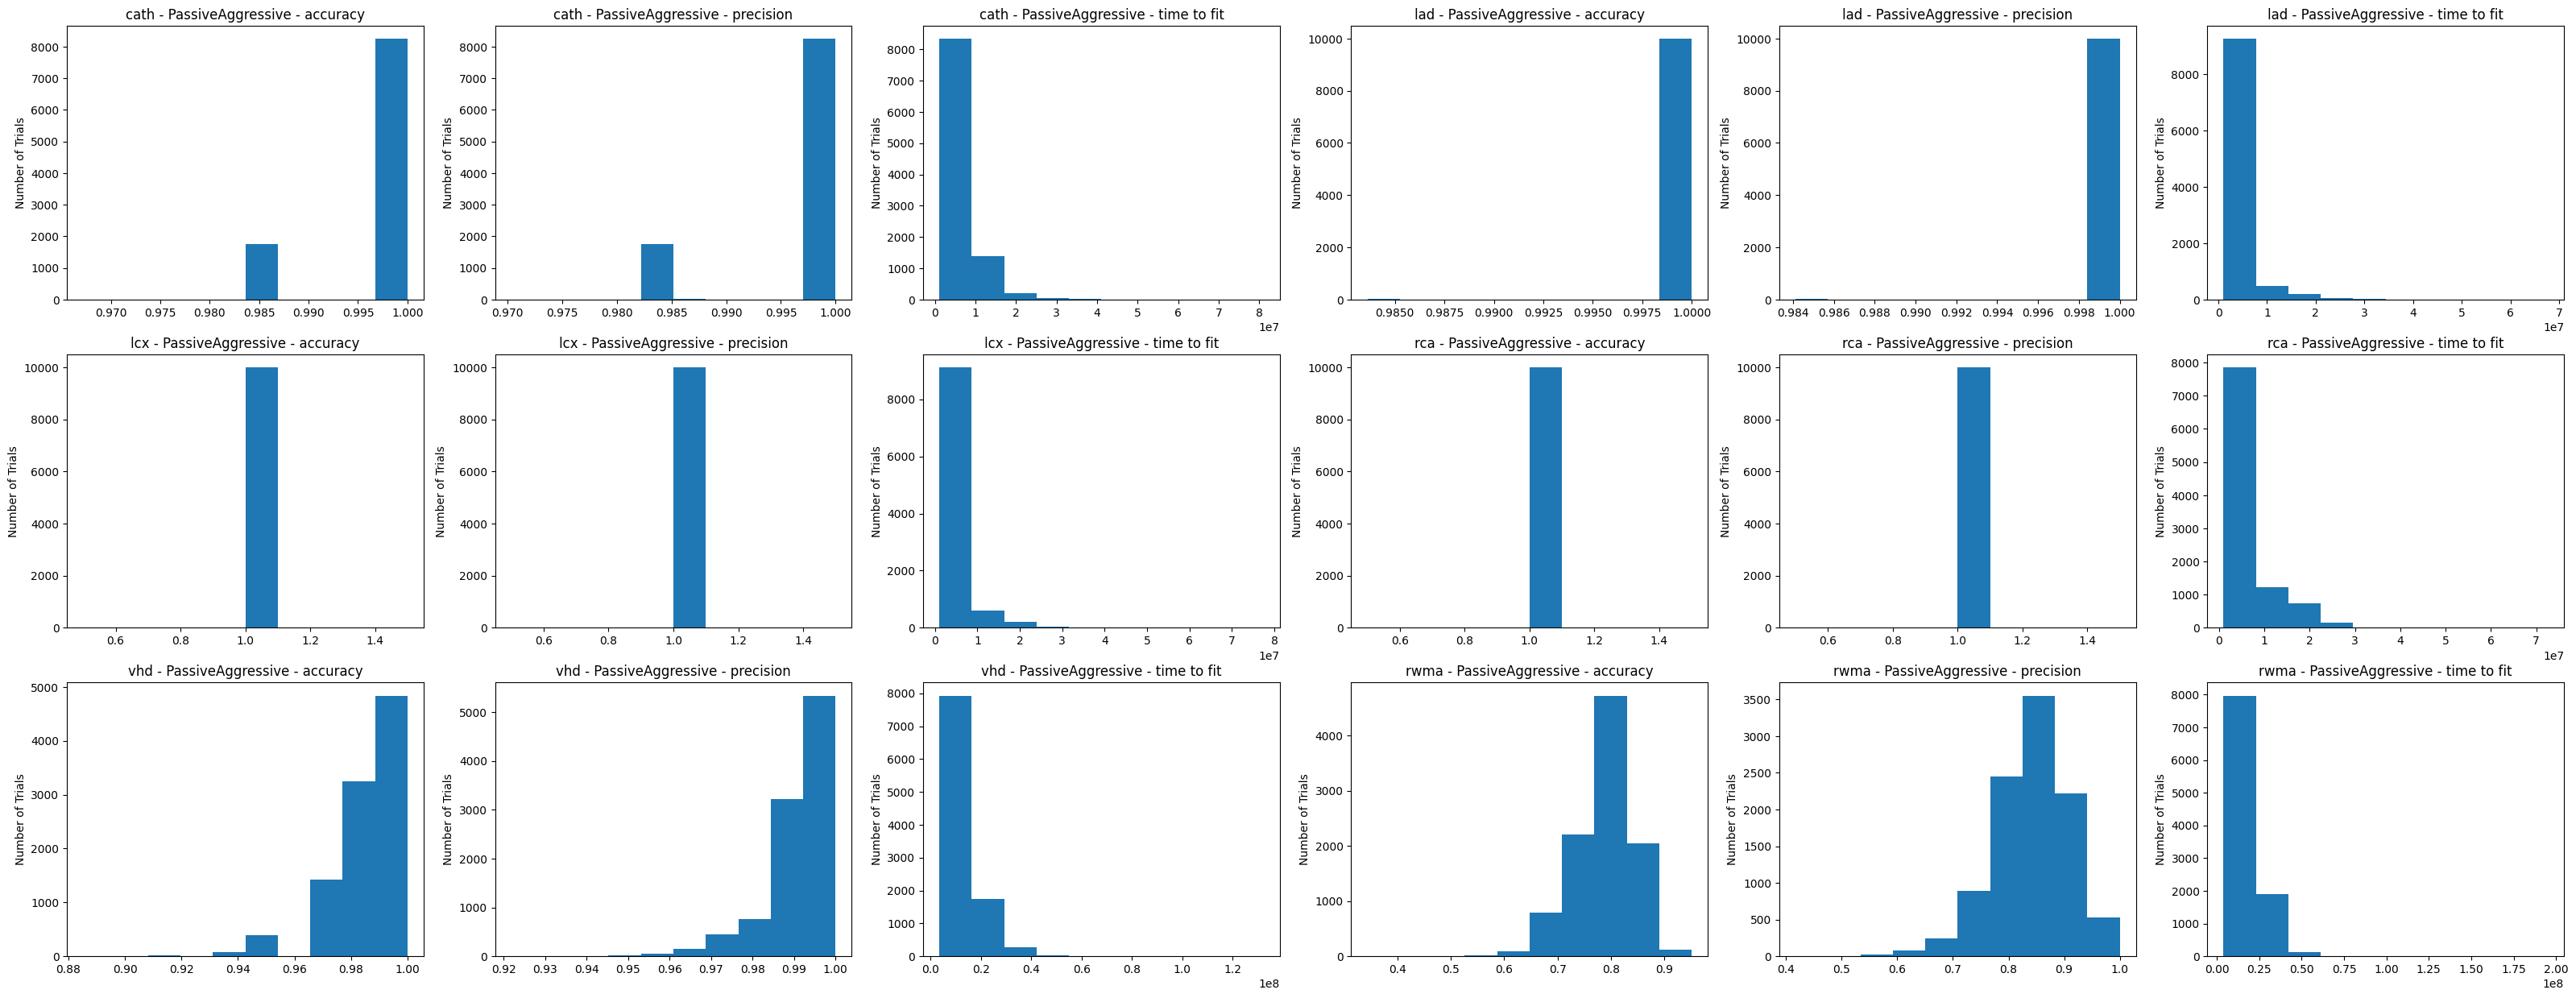

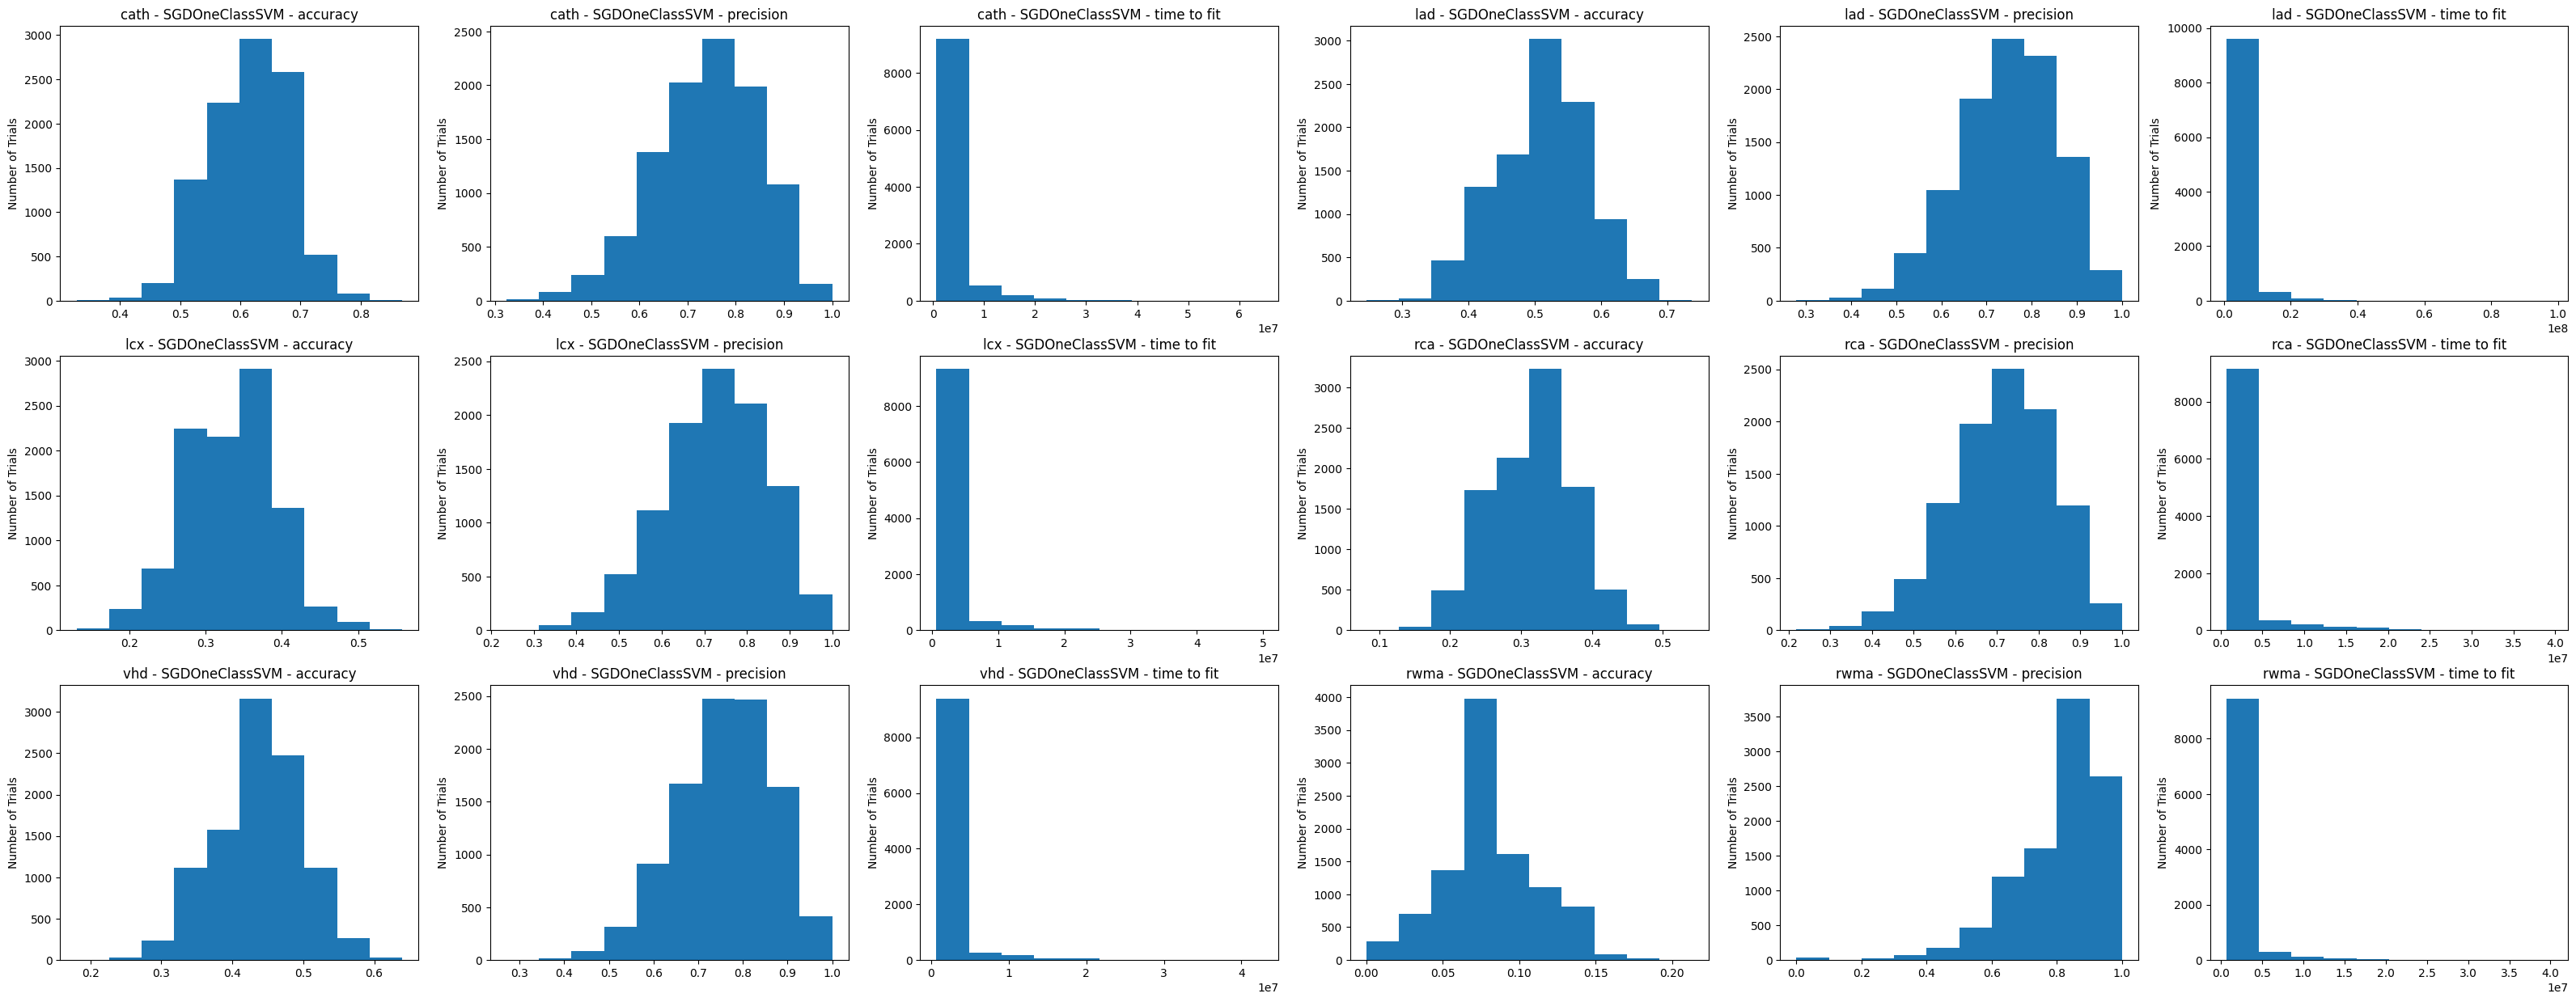

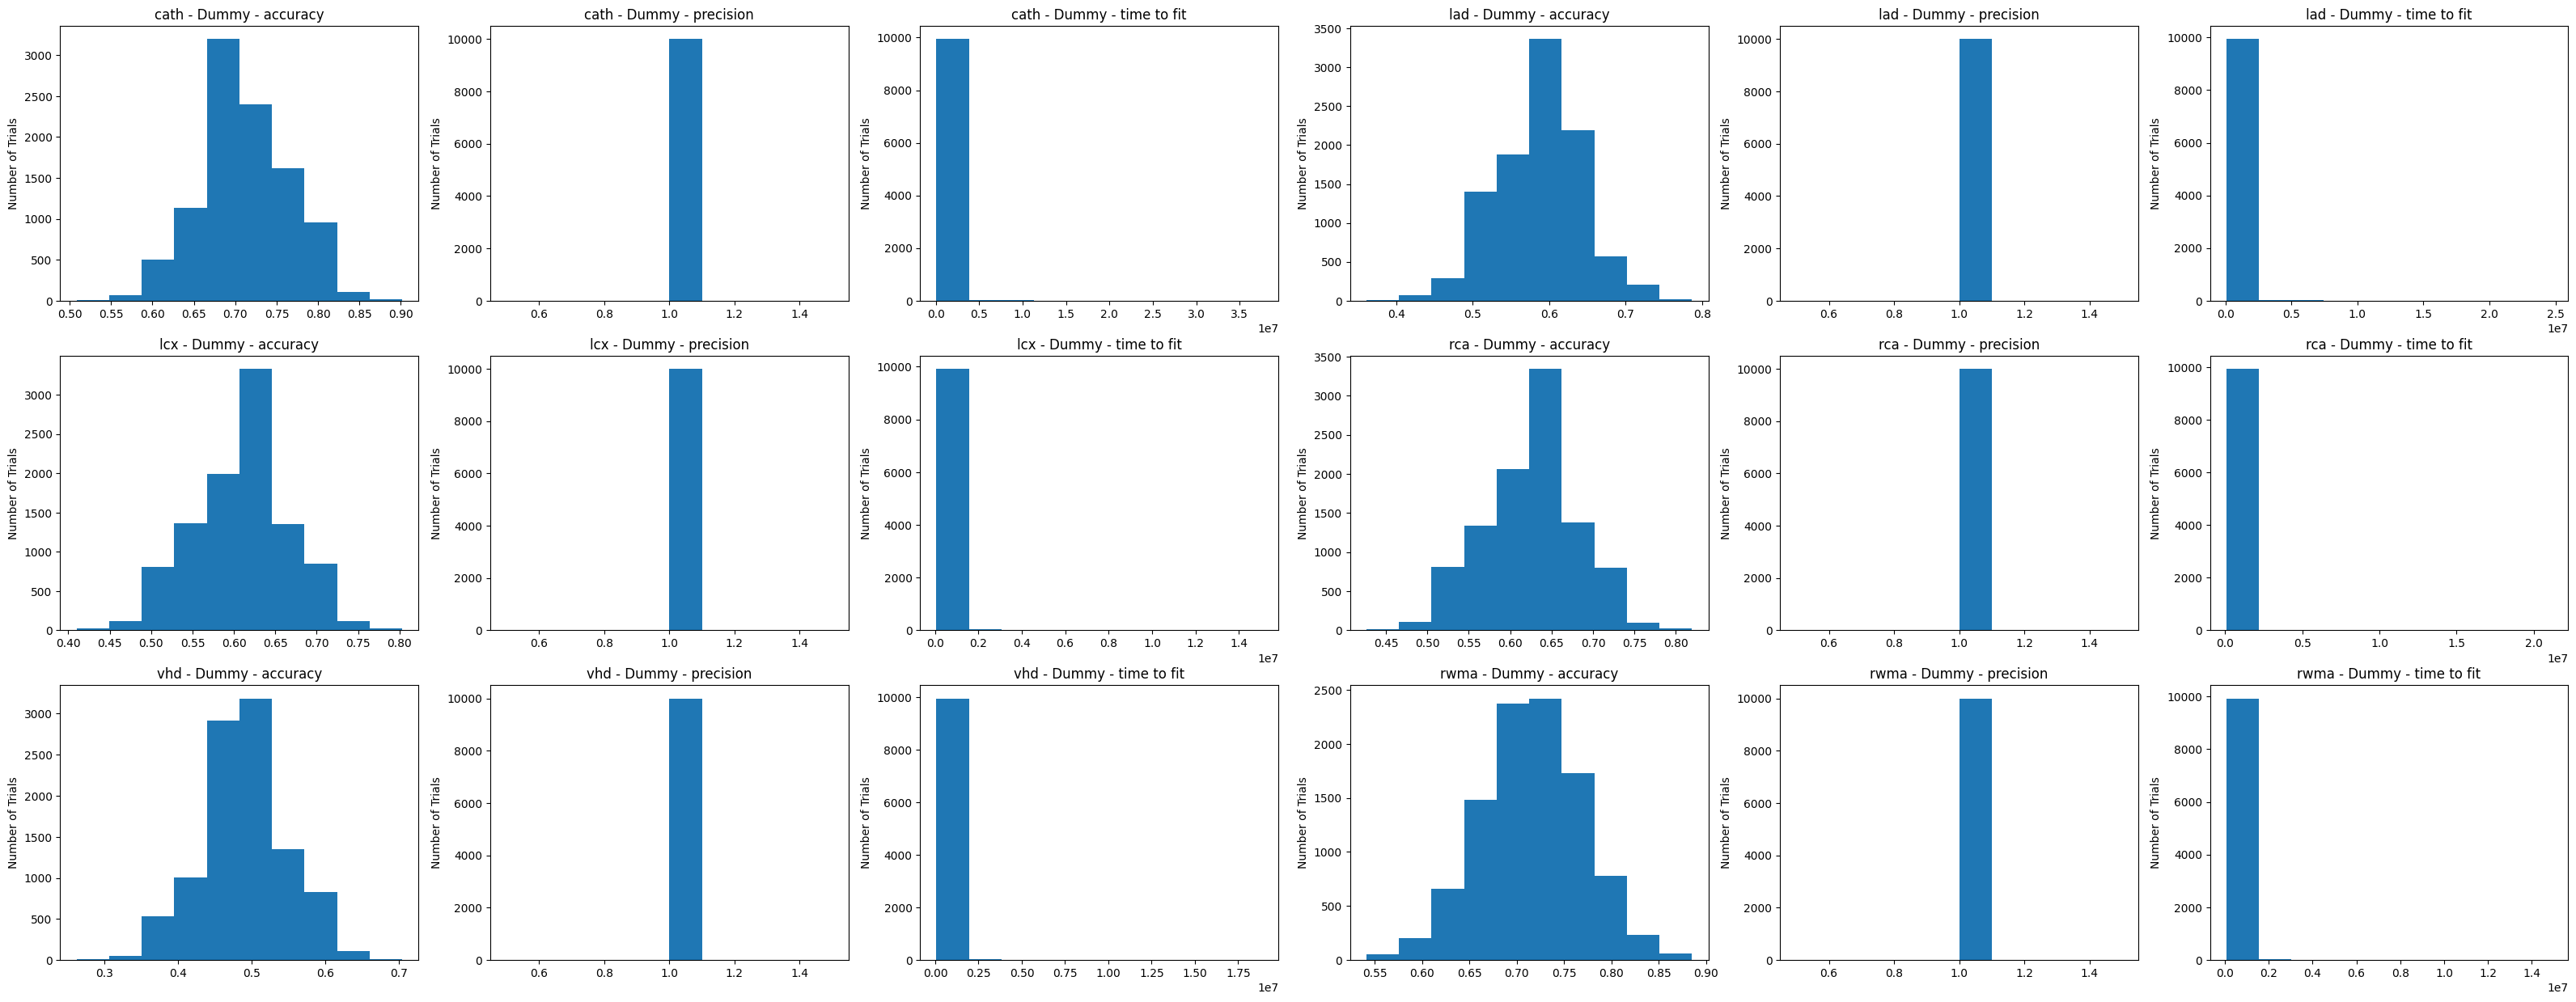

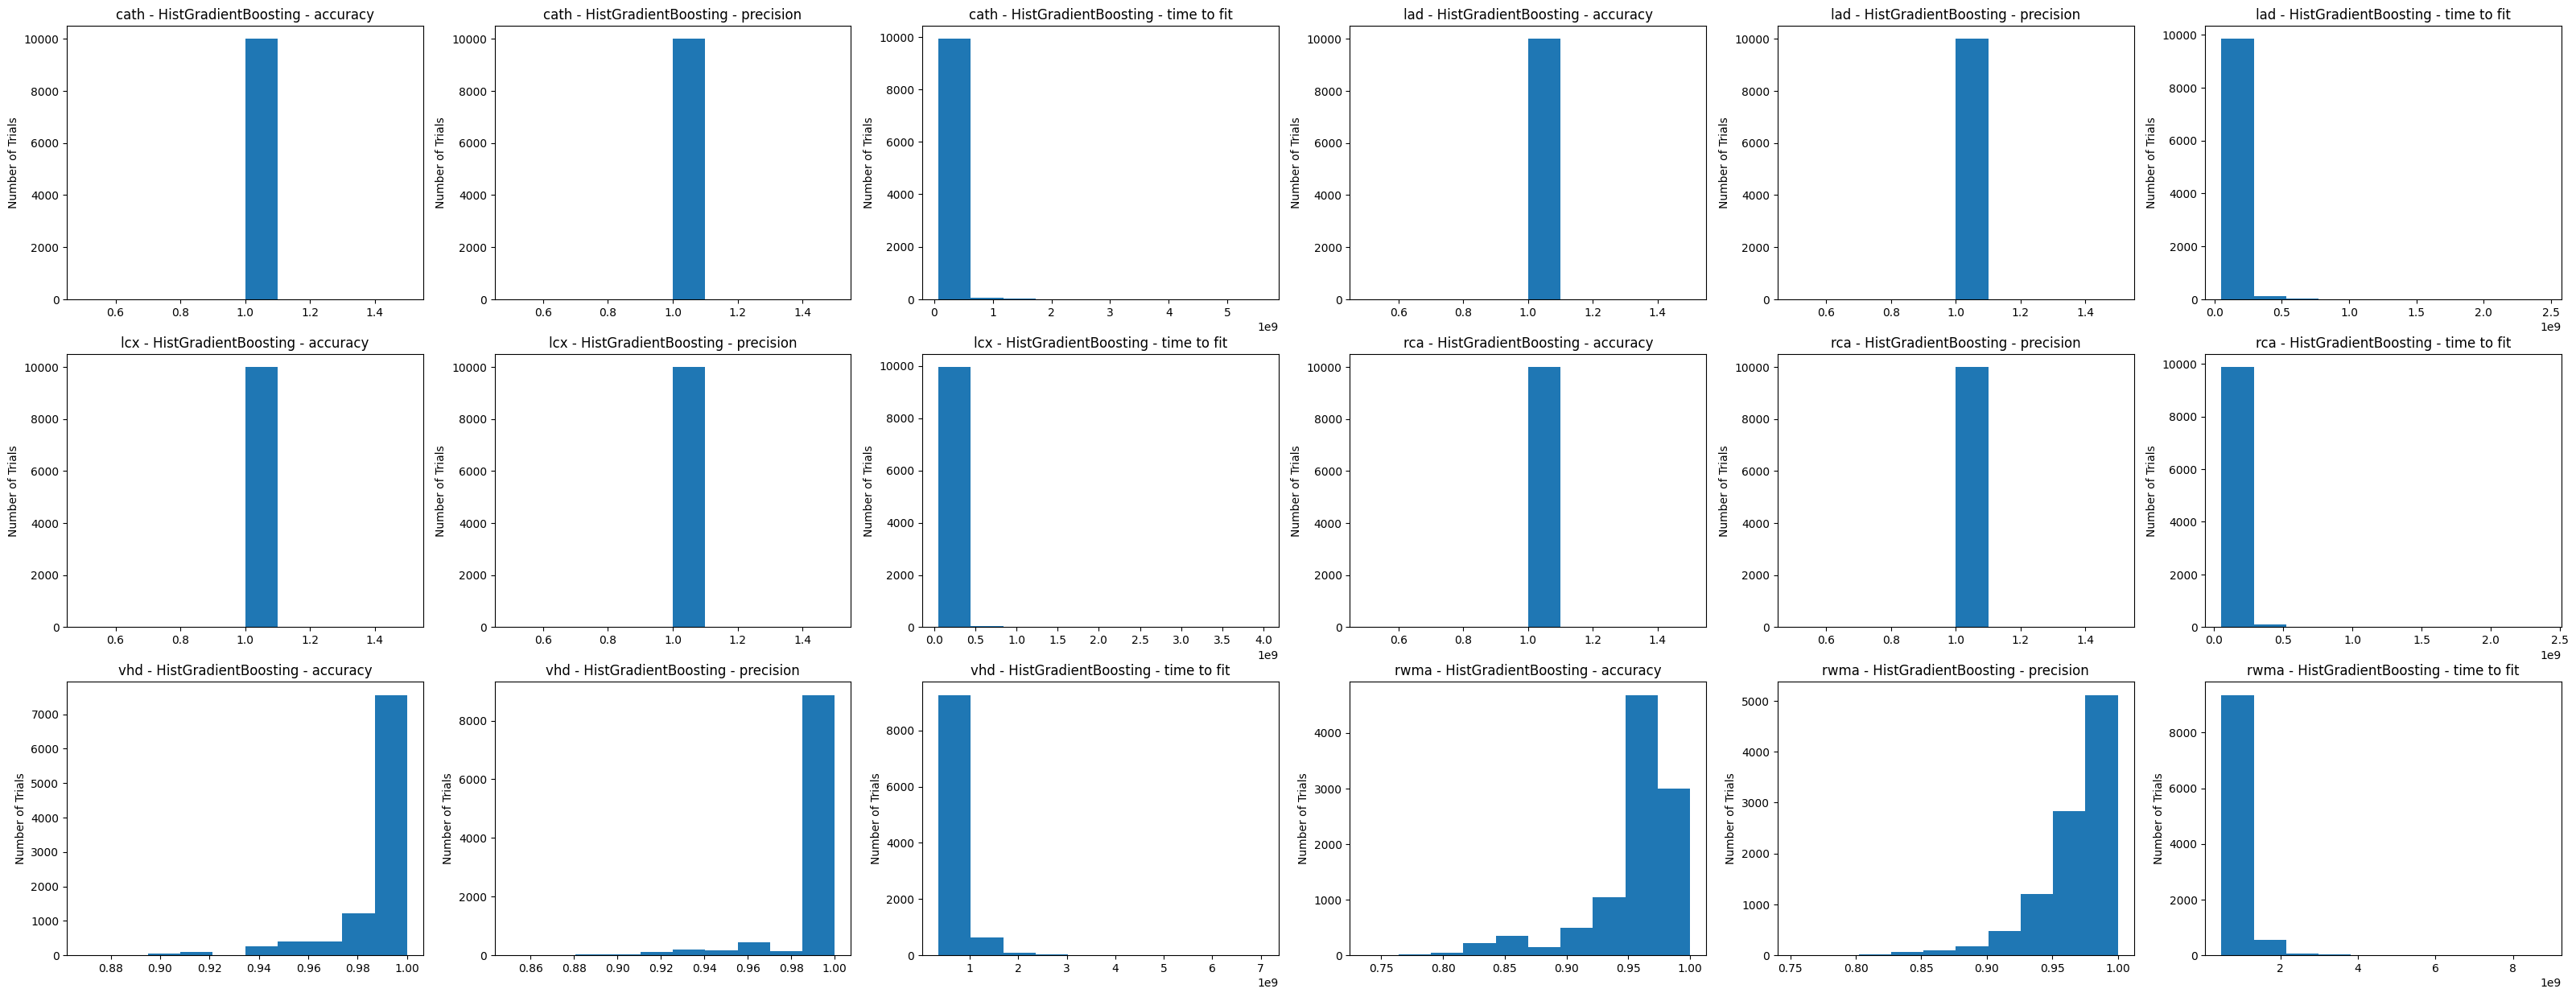

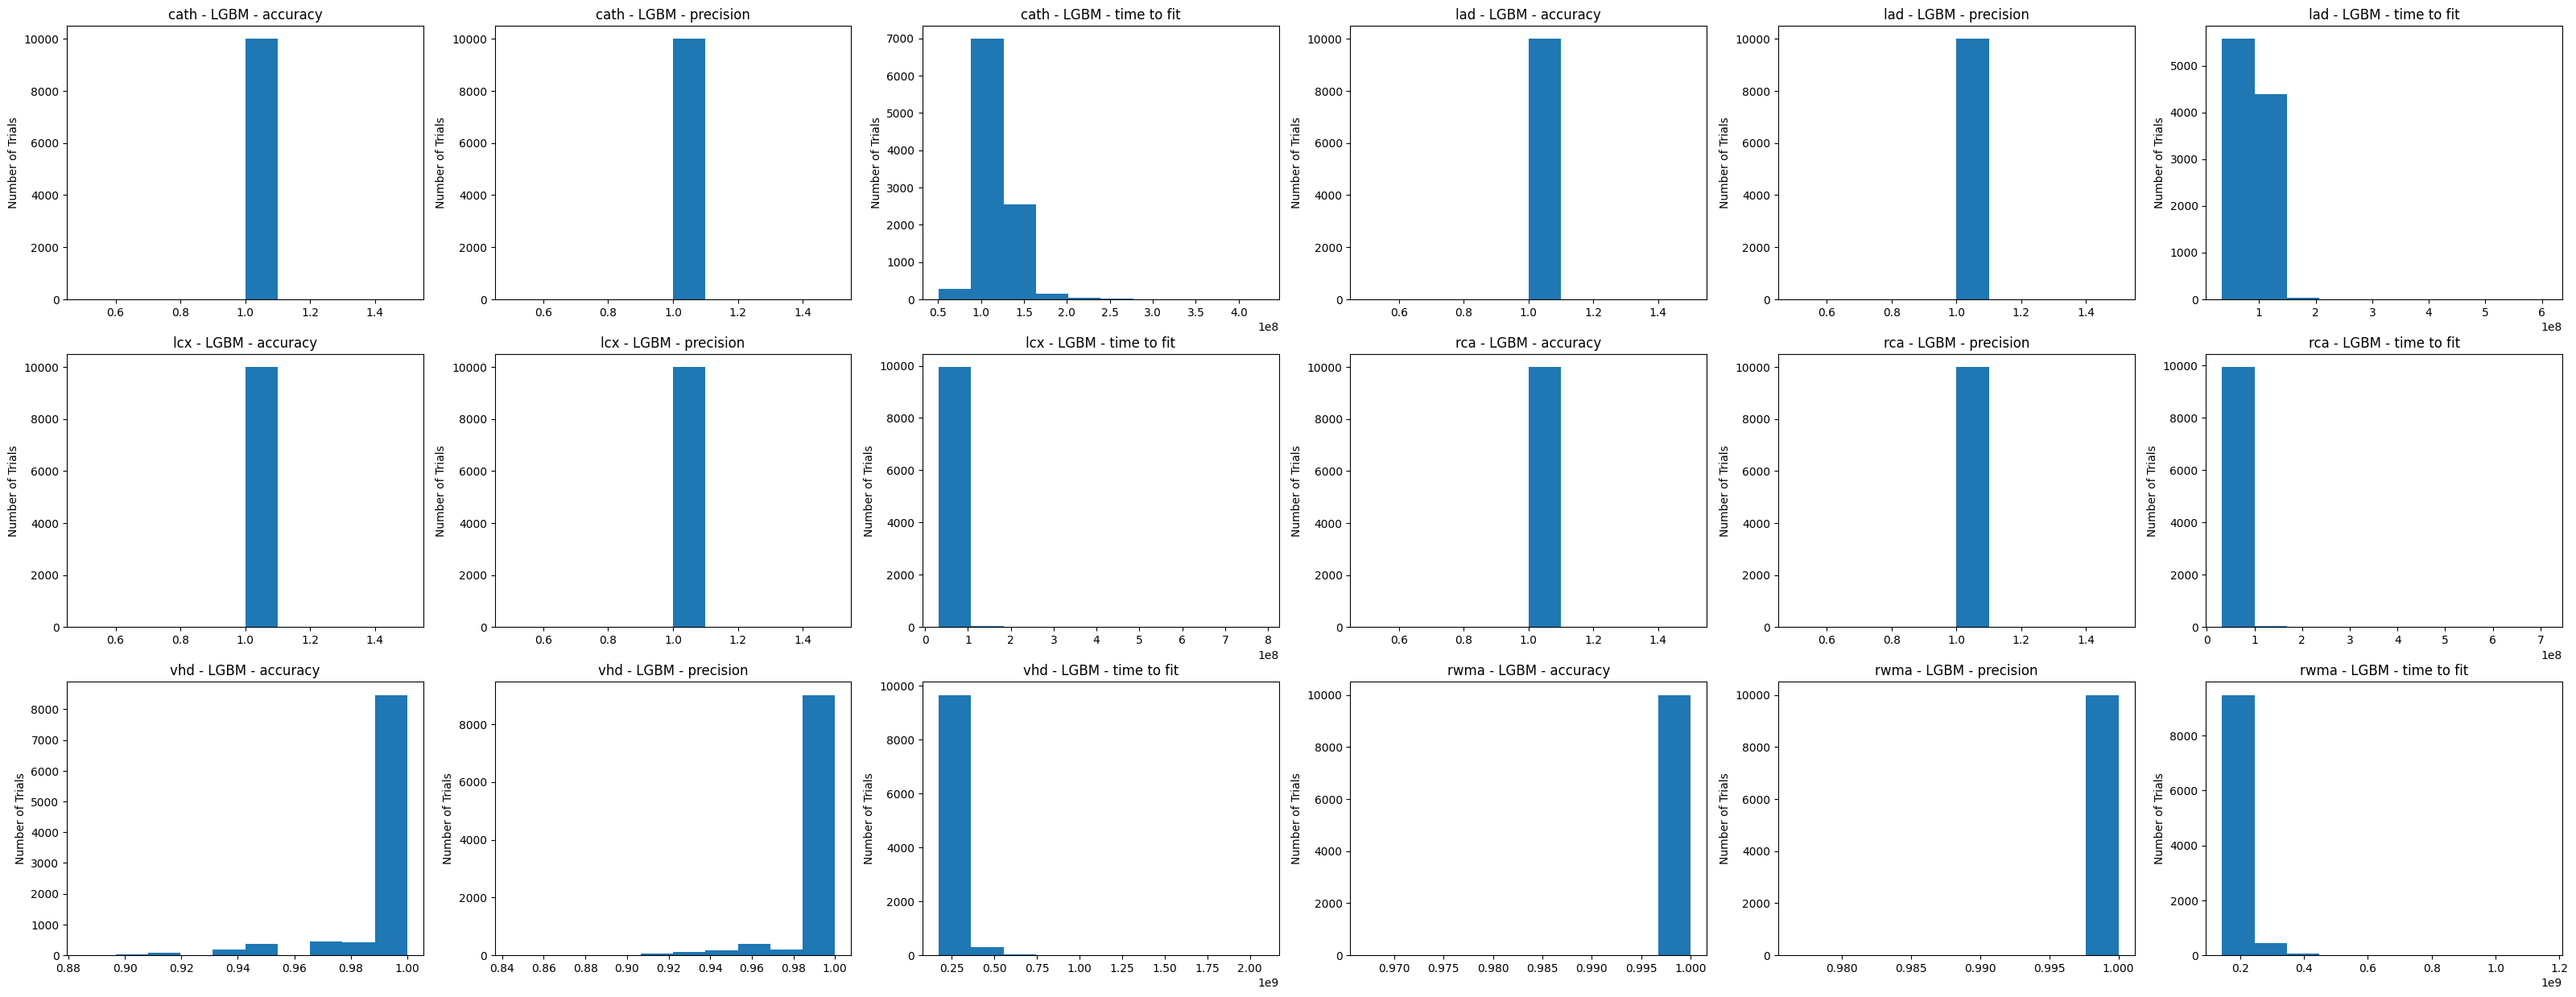

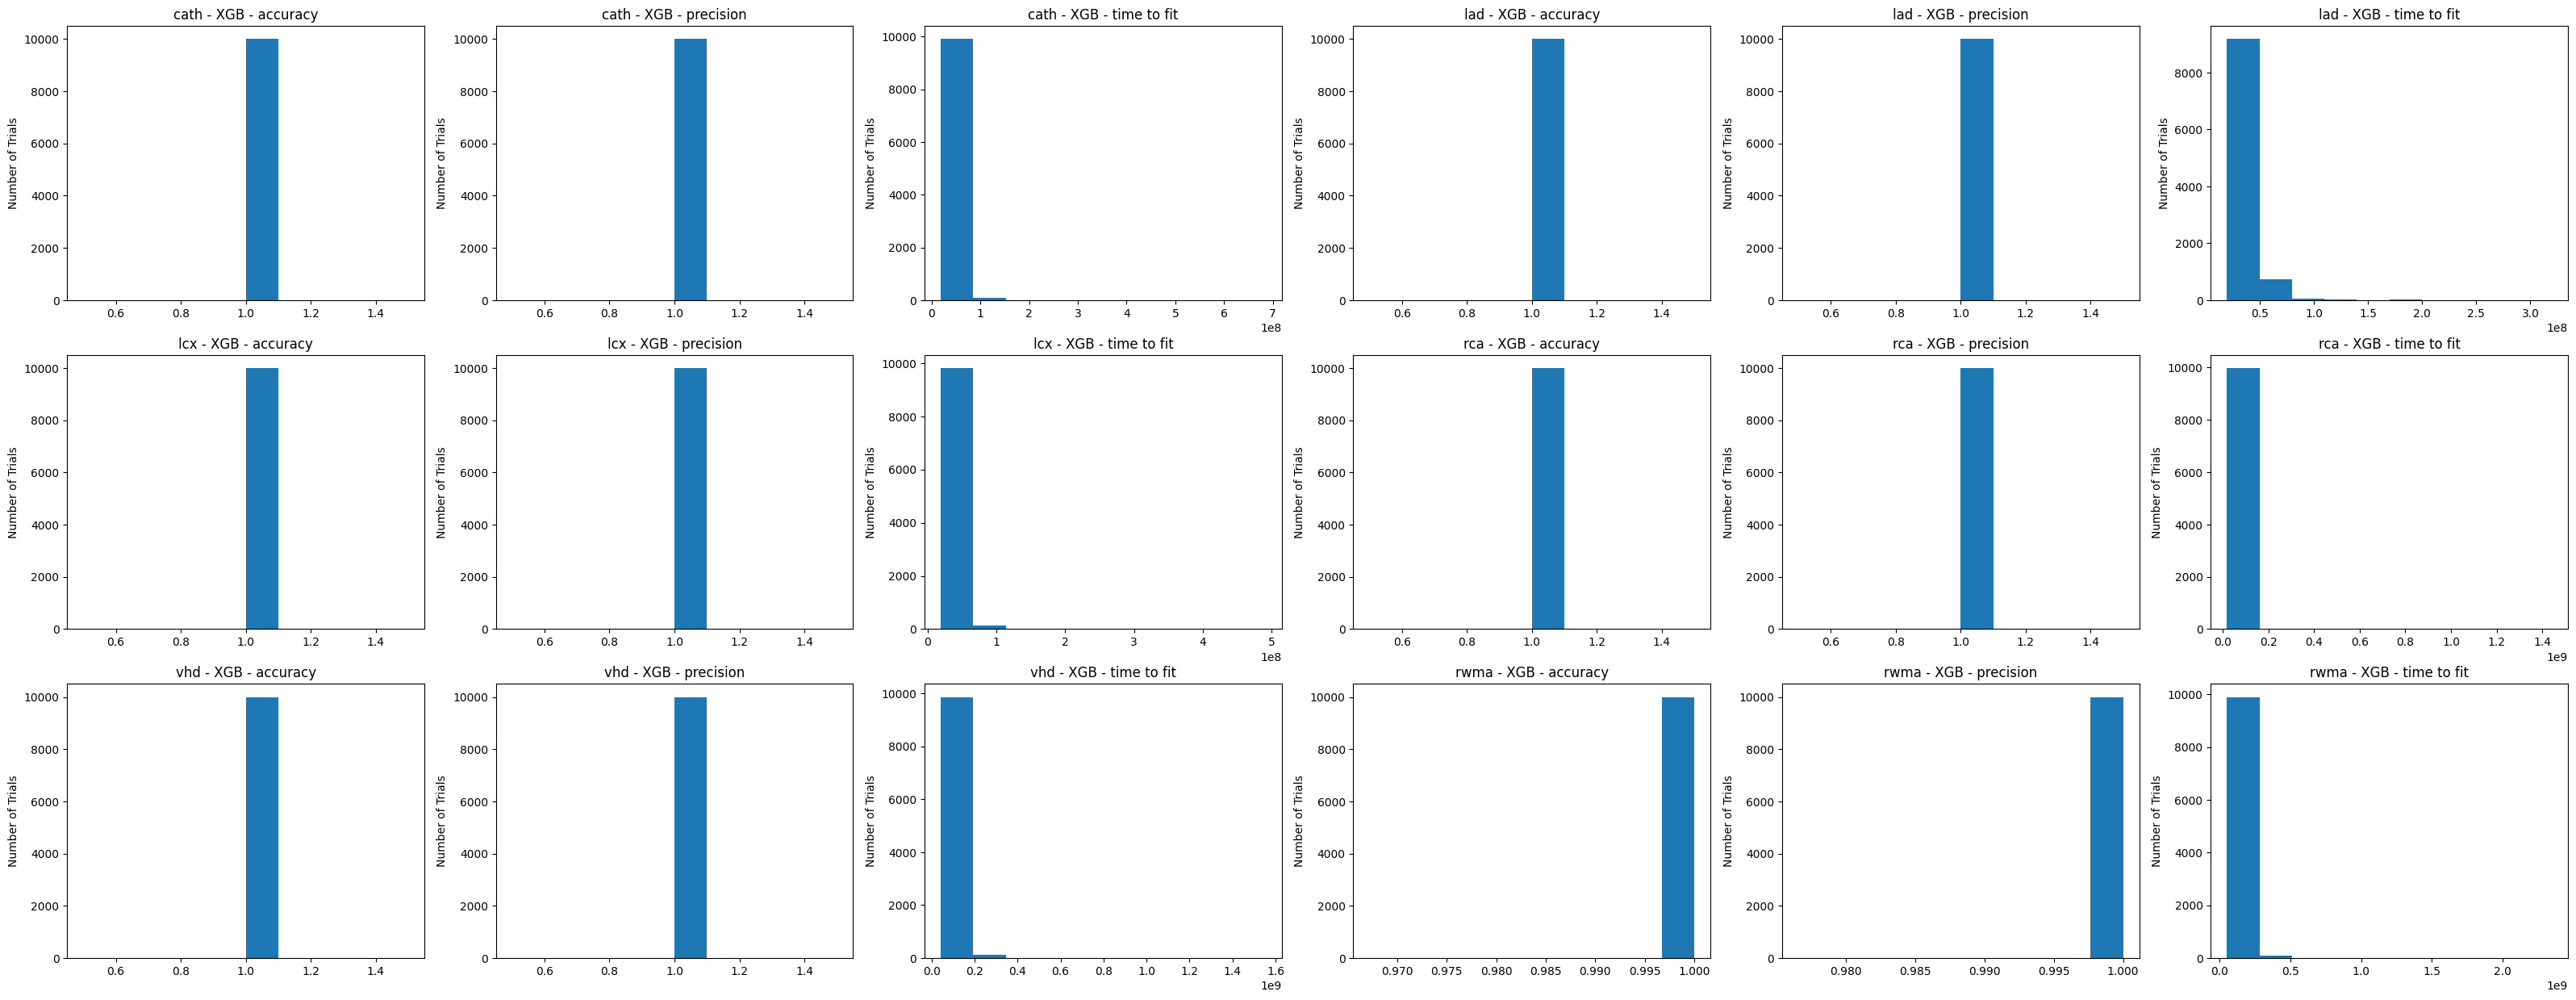

In [35]:
# Distribution of accuracy
# Use Subplots
index = 1
for subplot in range(19):
    fig, axs = plt.subplots(3, 6, figsize=(40, 15))
    backtrack = 0
    for local_index in range(index, index + 24):
        i = df.columns[local_index]
        if 'balanced' in i:
            backtrack += 1
            continue
        row = (local_index - index - backtrack) // 6
        col = (local_index - index - backtrack) % 6
        axs[row, col].hist(df[i])
        axs[row, col].set_title(i)
        axs[row, col].set_ylabel('Number of Trials')
    plt.savefig(f'./Graphs/Distribution of {df.columns[index].split(" - ")[1]}.png')
    index += 24
    plt.show()

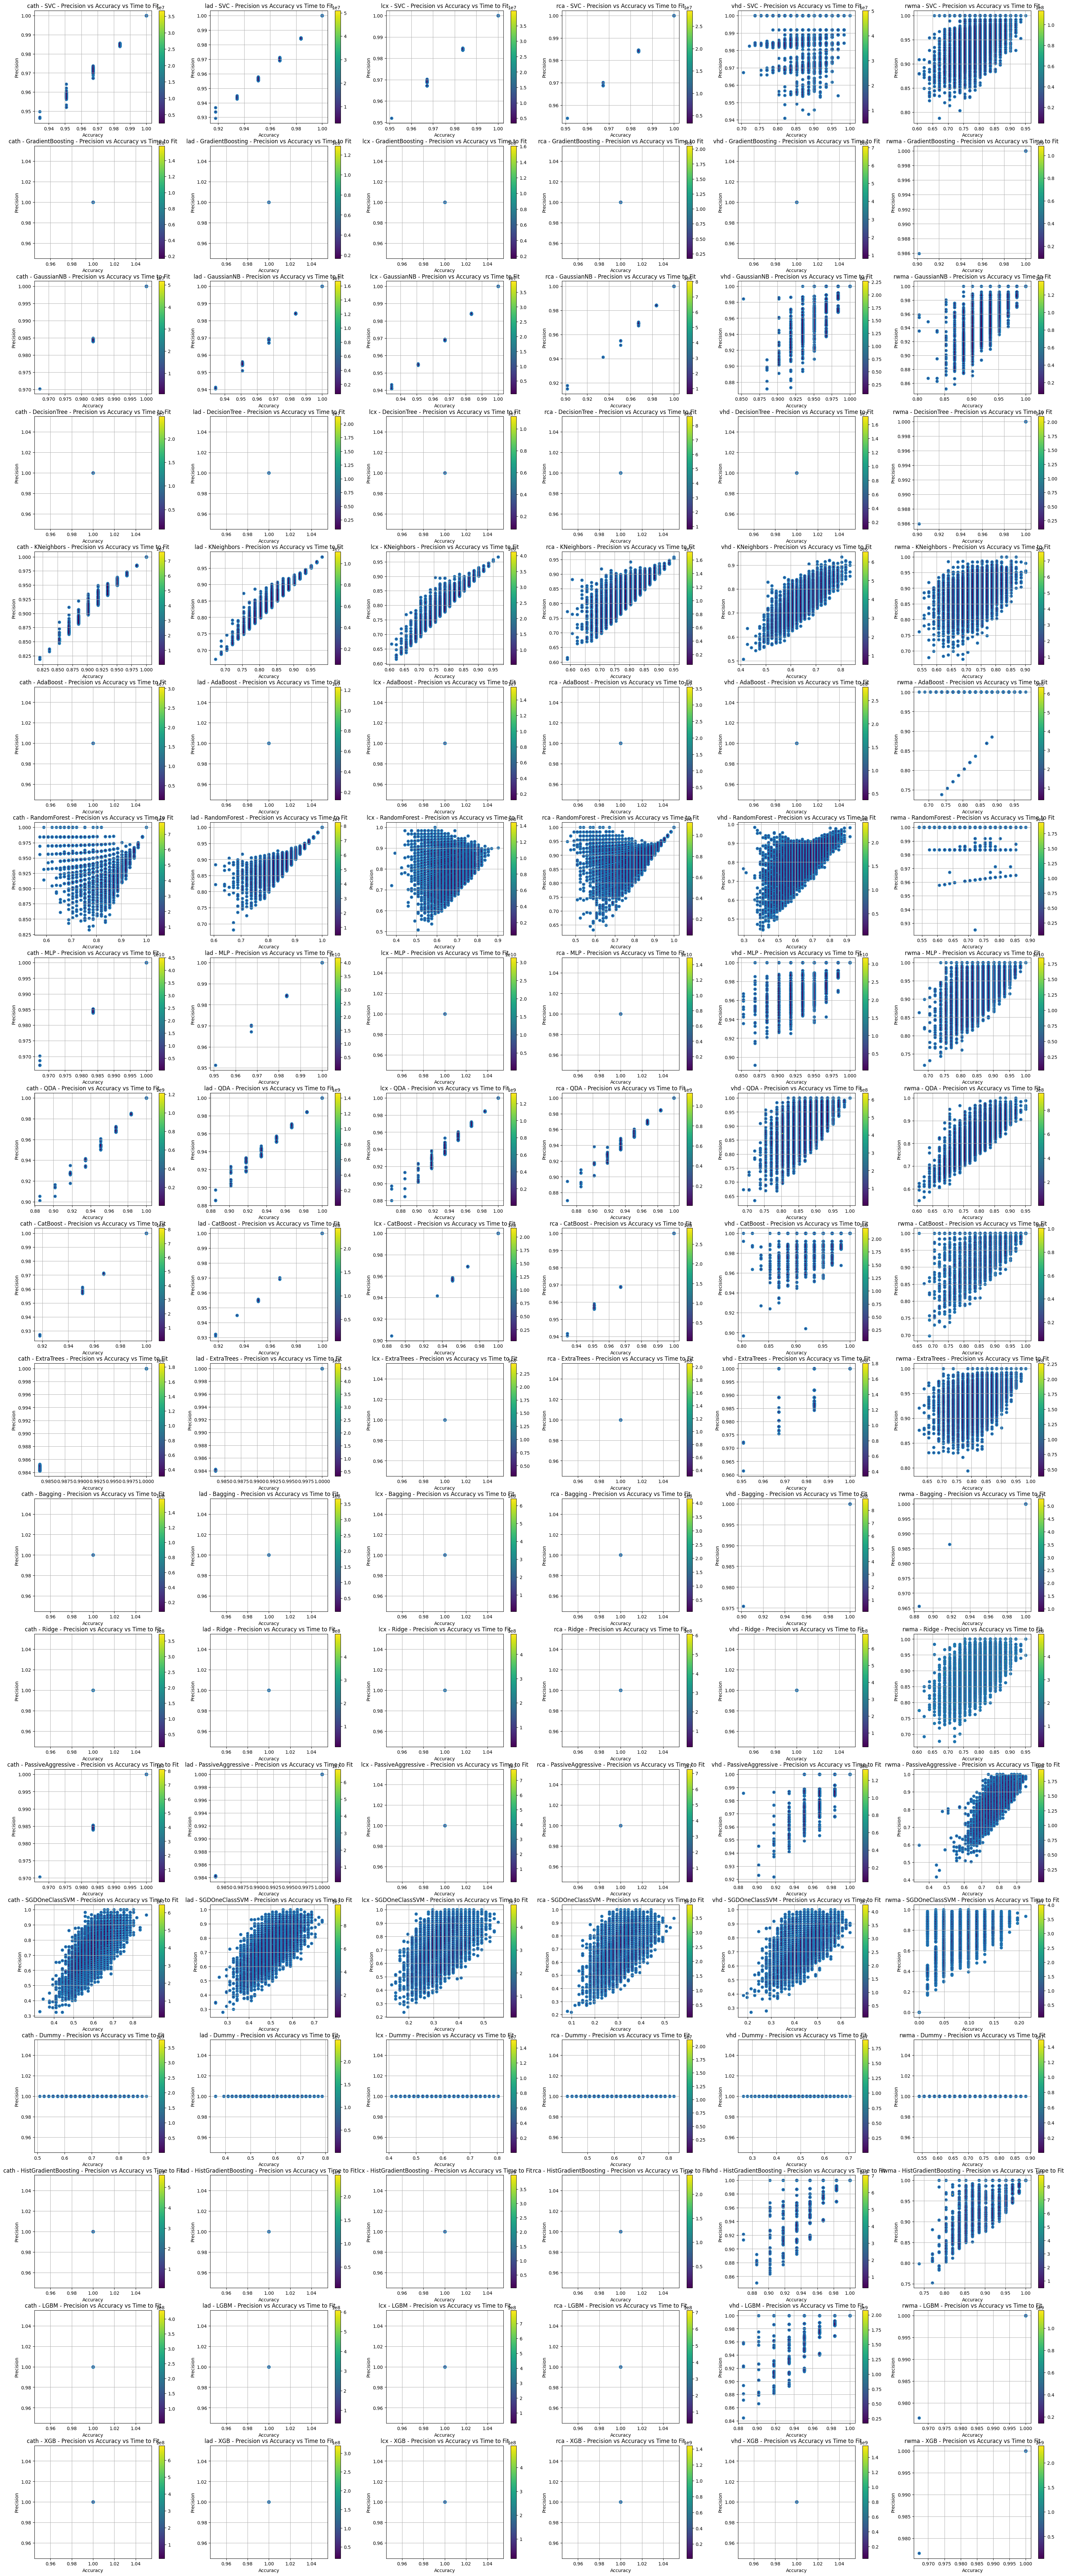

In [36]:
# Precision to Accuracy Plot with colorbar that shows time to fit
# x axis is accuracy
# y axis is precision
# colorbar is time to fit
# score as size of dot
# Use Subplots
fig, axs = plt.subplots(19, 6, figsize=(40, 100))
backtrack = 0
for index, i in enumerate(df.columns[1:]):
    if 'balanced' in i or 'time' in i or 'precision' in i:
        backtrack += 1
        continue
    row = (index - backtrack) // 6
    col = (index - backtrack) % 6
    axs[row, col].scatter(df[i], df[i.replace('accuracy', 'precision')])
    axs[row, col].set_xlabel('Accuracy')
    axs[row, col].set_ylabel('Precision')
    axs[row, col].set_title(i.replace(' - accuracy', '') + ' - Precision vs Accuracy vs Time to Fit')
    axs[row, col].grid(True)
    fig.colorbar(axs[row, col].scatter(df[i], df[i.replace('accuracy', 'precision')], c=df[i.replace('accuracy', 'time to fit')], s=get_score(i.replace(' - accuracy', '')), cmap='viridis'), ax=axs[row, col])
plt.savefig('./Graphs/Precision vs Accuracy vs Time to Fit.png')
plt.show()
